### 중앙 기사 데이터 수집
- scrapy에서 selenium 사용해보기
- pipeline 사용하기

#### 1. 프로젝트 생성

In [15]:
!scrapy startproject itchosun_article

New Scrapy project 'itchosun_article', using template directory '/home/ubuntu/.pyenv/versions/3.6.9/envs/python3/lib/python3.6/site-packages/scrapy/templates/project', created in:
    /home/ubuntu/python3/notebook/itchosun_article

You can start your first spider with:
    cd itchosun_article
    scrapy genspider example example.com


In [16]:
!tree itchosun_article/

itchosun_article/
├── itchosun_article
│   ├── __init__.py
│   ├── items.py
│   ├── middlewares.py
│   ├── pipelines.py
│   ├── settings.py
│   └── spiders
│       └── __init__.py
└── scrapy.cfg

2 directories, 7 files


#### 2. xpath 찾기
- article links: 

In [7]:
import scrapy
import requests
import json
from scrapy.http import TextResponse

In [8]:
#경제
url = "http://it.chosun.com/svc/list_in/list.html?catid=A&pn=1"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.67 Safari/537.36"}
req = requests.get(url, headers=headers)
req

<Response [200]>

In [9]:
response = TextResponse(req.url, body=req.text, encoding="utf-8")

In [10]:
import konlpy
from konlpy.tag import Mecab
mecab = Mecab()
print(mecab.morphs(title[2]))

NameError: name 'title' is not defined

In [7]:
from konlpy.tag import Hannanum
hannanum = Hannanum()
print(hannanum.morphs(title[2]))

['지브레인,', '뇌과학·신경과학', '체험형', '교보재', '‘HumanIN’', '개발']


In [8]:
import konlpy
from konlpy.tag import Mecab
for titles2 in title:
    print(mecab.morphs(titles2))

['오', '클린', 'Xpro', ',', '터치스크린', '장착', '음파', '전동', '칫솔', "'", '국내', '정식', '입점']
['얼라', '이브', ',', '마음', '채움', '캠페인', '실시', '…', '“', '따뜻', '한', '마음', '을', '전하', '세요', '”']
['지브', '레인', ',', '뇌', '과학', '·', '신경', '과학', '체험', '형', '교보재', '‘', 'HumanIN', '’', '개발']
['다비', '오', ',', '서울', '시립', '과', '학관', '에', '스마트', '도슨', '트', '서비스', '실증', '진행']
['법률', '서비스', '플랫', '폼', "'", '로', '톡', "',", '객관', '적', '인', '매칭', '서비스', '제공']
['이루', '다', '마케팅', ',', '서울', '벤처', '스와', '애드', '테크', '사업', 'MOU', '체결']
['10', '대', '전용', 'SNS', '‘', '오잉', '’,', 'Mnet', '오디션', '프로', '‘', '캡틴', '’', '투표', '채널', '선정']
['티르', '티르', '‘', '도자기', '코어', '크림', '’,', 'CJ', '오', '쇼핑', '론', '칭', '앞두', '고', '‘', '미리', '주문', '’', '오픈']
['리앤', '블락', "'", '사디', '나스', '(', 'SARDINAS', ')', "',", '16', '일', '프로', '비트', '(', 'ProBit', ')', '상장']
['AR', '뷰티', '플랫', '폼', '‘', '티커', '(', 'Ticker', ')', '’,', '메', '이투', '(', 'Meitu', ')', '와', '기술', '협약', '체결']
['조선', '미디어', '그룹', 'IT', '조선', '이', '인공지능', '시대', '를', '이끌', '인턴', '기자',

In [2]:
import konlpy
from konlpy.tag import Mecab


In [25]:
len(content)

17

In [3]:
mecab = Mecab()


In [29]:
nouns = []
for idx in range(len(content)):
    nouns.extend(mecab.nouns(content[idx]))
print(nouns)

['전문', '기업', '주식회사', '빌드', '잇', '보급', '범용', '게이트웨이', '이하', '빌드', '씽', '게이트웨이', '출시', '이', '범용', '게이트웨이', '제품', '실제', '비즈니스', '도입', '수', '기존', '게이트웨이', '제품', '해외', '기업', '제품', '때문', '국내', '사업', '단계', '원활', '기술', '지원', '필요', '이상', '성능', '하드웨어', '스펙', '제품', '사용', '수', '단가', '현재', '파편', '표준', '별도', '커', '스터', '마이', '징', '비용', '연동', '개발', '비용', '발생', '등', '어려움', '빌드', '잇', '빌드', '씽', '게이트웨이', '블루투스', '통신', '로컬', '서버', '클라우드', '서버', '연결', '게이트웨이', '제품', '고객', '사', '게이트웨이', '설정', '수', '고객', '사', '전력', '블루투스', '디바이스', '객사', '자체', '개발', '서버', '연동', '가능', '원', '서버', '장치', '데이터', '무선', '수집', '수', '타입', '빌드', '잇', '비콘', '솔루션', '실내', '공기', '모니터링', '솔루션', '하중', '모니터링', '솔루션', '등', '빌드', '잇', '제품군', '연동', '타입', '별도', '출시', '소비자', '선택', '폭', '빌드', '씽', '게이트웨이', '회로', '설계', '펌웨어', '연관', '소프트웨어', '빌드', '잇', '자체', '개발', '제품', '관리자', '앱', '무료', '지원', '블루투스', '이상', '탑재', '스마트폰', '랩탑', '등', '게이트', '웨이', '스캔', '장치', '타입', '서버', '연결', '정보', '등', '설정', '수', '등', '표준', '통신', '프로토콜', '메시지', '규격', '지원', '등', '동종'

In [51]:
content[0]

'IoT 전문기업 주식회사 빌드잇이 보급형 범용 IoT 게이트웨이인 ‘BuildThing Gateway’(‘이하 빌드씽 게이트웨이)를 출시했다고 밝혔다.'

In [49]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [62]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
stop_words = []
example = content[0]
for idx in range(len(nouns)):
    if len(nouns[idx])== 1:
        stop_words.extend(nouns[idx])
# 위의 불용어는 명사가 아닌 단어 중에서 저자가 임의로 선정한 것으로 실제 의미있는 선정 기준이 아님
word_tokens = word_tokenize(example)

result = [] 
for w in word_tokens: 
    if w not in stop_words: 
        result.append(w) 
# 위의 4줄은 아래의 한 줄로 대체 가능
# result=[word for word in word_tokens if not word in stop_words]
print(stop_words)
print(word_tokens) 
print(result)

['잇', '씽', '이', '수', '수', '커', '징', '등', '잇', '씽', '사', '수', '사', '원', '수', '잇', '등', '잇', '폭', '씽', '잇', '앱', '등', '등', '수', '등', '등', '수', '평', '브', '공', '사', '등', '잇', '씽', '씽', '뿐', '씽', '트', '등', '톱', '의', '기', '술', '것', '것', '년', '씽', '등', '폼']
['IoT', '전문기업', '주식회사', '빌드잇이', '보급형', '범용', 'IoT', '게이트웨이인', '‘', 'BuildThing', 'Gateway', '’', '(', '‘', '이하', '빌드씽', '게이트웨이', ')', '를', '출시했다고', '밝혔다', '.']
['IoT', '전문기업', '주식회사', '빌드잇이', '보급형', '범용', 'IoT', '게이트웨이인', '‘', 'BuildThing', 'Gateway', '’', '(', '‘', '이하', '빌드씽', '게이트웨이', ')', '를', '출시했다고', '밝혔다', '.']


In [68]:
!pip install wordcloud

     |████████████████████████████████| 366 kB 1.6 MB/s eta 0:00:01     |████████                        | 92 kB 2.2 MB/s eta 0:00:01     |█████████████▍                  | 153 kB 1.6 MB/s eta 0:00:01


In [67]:
ko = nltk.Text(nouns , name='분석')
ko.vocab().most_common(3)

[('빌드', 13), ('게이트웨이', 11), ('등', 9)]

In [93]:
result = "".join(content)
result

'IoT 전문기업 주식회사 빌드잇이 보급형 범용 IoT 게이트웨이인 ‘BuildThing Gateway’(‘이하 빌드씽 게이트웨이)를 출시했다고 밝혔다.이에 범용 IoT 게이트웨이 제품을 실제 비즈니스에 쉽게 도입할 수 있게 되었다.기존 게이트웨이 제품들은 해외 기업 제품이기 때문에 국내에서 사업화 단계까지 원활하게 기술 지원을 받지 못하거나, 필요 이상의 고성능 하드웨어 스펙을 갖춘 제품을 사용할 수밖에 없어 단가가 높아지고, 현재까지도 파편화 되어있는 IoT 표준으로 인하여 별도의 커스터마이징 비용이나 연동 개발 비용이 크게 발생하는 등의 어려움이 있었다.빌드잇의 빌드씽 게이트웨이는 블루투스 5.1 통신을 Ethernet과 Wi-Fi로 로컬 TCP 서버 또는 클라우드 서버와 연결하는 IoT 게이트웨이로, 제품은 고객사가 직접 게이트웨이의 설정을 할 수 있어 고객사의 BLE(저전력 블루투스) 디바이스 또는 고객사가 자체 개발한 서버와 연동이 가능하다. 또 원하는 서버에 원하는 BLE 장치들의 데이터를 무선으로 수집할 수 있는 Universal 타입과 빌드잇의 비콘 솔루션(BuildThing Beacon), 실내 공기질 모니터링 솔루션(BuildThing IAQ), 하중 모니터링 솔루션(BuildThing Loadcell) 등 빌드잇의 제품군들과 연동되는 타입이 별도로 출시되어 소비자 선택의 폭을 넓혔다.빌드씽 게이트웨이는 회로 설계부터 펌웨어, 연관 소프트웨어들까지 모두 빌드잇에서 자체 개발한 제품으로, BuildThing Admin 관리자 앱을 무료로 지원하고, 블루투스 4.0 이상이 탑재된 스마트폰과 랩탑 등에서 게이트웨이가 스캔할 BLE 장치의 타입과 서버 연결 정보 등을 직접 설정할 수 있으며, HTTP/MQTT 등 표준 통신 프로토콜과 JSON 메시지 규격을 지원하는 등 동종 스펙의 제품 대비 저렴한 가격으로 사용자들이 IoT 솔루션을 더 친숙하고 빠르게 도입할 수 있도록 한다.또한, 블루투스 5.1 기반으로 별도의 기술 지원을 통해 Long Ran

In [81]:
contents = []
for idx in range(len(content)):
    contents.extend(mecab.nouns(content[idx]))
contents

['전문',
 '기업',
 '주식회사',
 '빌드',
 '잇',
 '보급',
 '범용',
 '게이트웨이',
 '이하',
 '빌드',
 '씽',
 '게이트웨이',
 '출시',
 '이',
 '범용',
 '게이트웨이',
 '제품',
 '실제',
 '비즈니스',
 '도입',
 '수',
 '기존',
 '게이트웨이',
 '제품',
 '해외',
 '기업',
 '제품',
 '때문',
 '국내',
 '사업',
 '단계',
 '원활',
 '기술',
 '지원',
 '필요',
 '이상',
 '성능',
 '하드웨어',
 '스펙',
 '제품',
 '사용',
 '수',
 '단가',
 '현재',
 '파편',
 '표준',
 '별도',
 '커',
 '스터',
 '마이',
 '징',
 '비용',
 '연동',
 '개발',
 '비용',
 '발생',
 '등',
 '어려움',
 '빌드',
 '잇',
 '빌드',
 '씽',
 '게이트웨이',
 '블루투스',
 '통신',
 '로컬',
 '서버',
 '클라우드',
 '서버',
 '연결',
 '게이트웨이',
 '제품',
 '고객',
 '사',
 '게이트웨이',
 '설정',
 '수',
 '고객',
 '사',
 '전력',
 '블루투스',
 '디바이스',
 '객사',
 '자체',
 '개발',
 '서버',
 '연동',
 '가능',
 '원',
 '서버',
 '장치',
 '데이터',
 '무선',
 '수집',
 '수',
 '타입',
 '빌드',
 '잇',
 '비콘',
 '솔루션',
 '실내',
 '공기',
 '모니터링',
 '솔루션',
 '하중',
 '모니터링',
 '솔루션',
 '등',
 '빌드',
 '잇',
 '제품군',
 '연동',
 '타입',
 '별도',
 '출시',
 '소비자',
 '선택',
 '폭',
 '빌드',
 '씽',
 '게이트웨이',
 '회로',
 '설계',
 '펌웨어',
 '연관',
 '소프트웨어',
 '빌드',
 '잇',
 '자체',
 '개발',
 '제품',
 '관리자',
 '앱',
 '무료',
 '지원',
 '블루투스',
 '이상',
 '탑재',


In [94]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path='font/NanumGothic.ttf', background_color='white').generate(result)
wordcloud

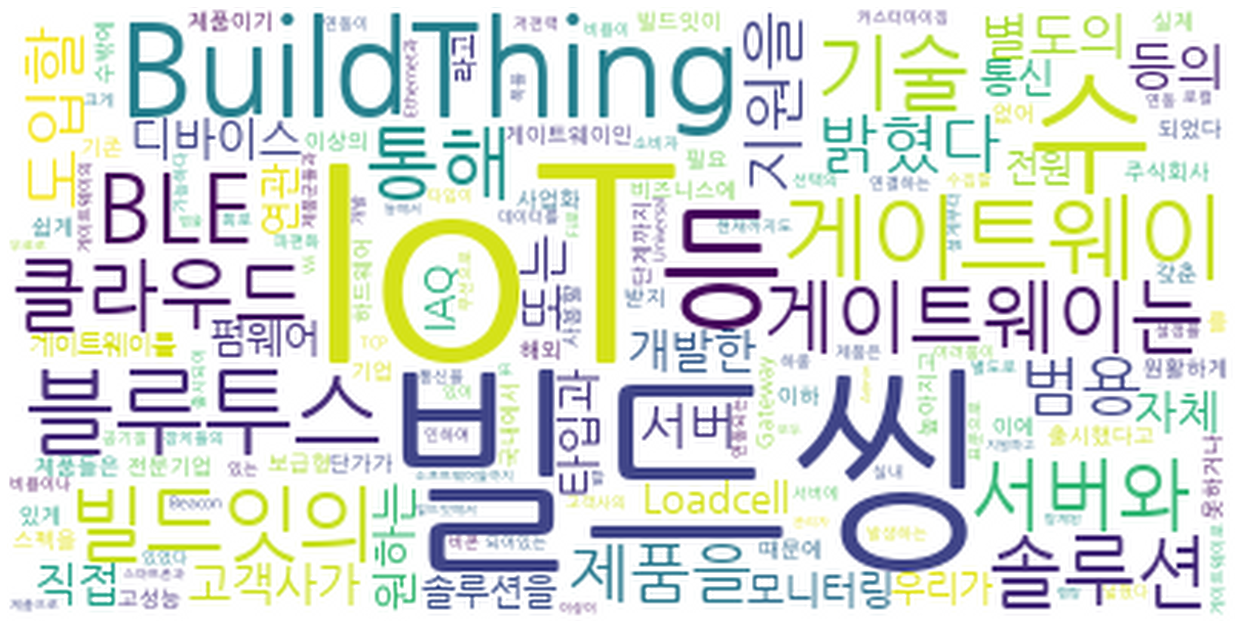

In [96]:
plt.figure(figsize=(22,22)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show() 
# plt.savefig()

In [53]:
# 자동 띄어쓰기 해주는 것
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-bpwfv9pu
     |████████████████████████████████| 320.4 MB 45.7 MB/s eta 0:00:01  |                                | 1.0 MB 1.7 MB/s eta 0:03:05     |▍                               | 3.9 MB 1.7 MB/s eta 0:03:03     |▌                               | 5.1 MB 1.7 MB/s eta 0:03:03     |██                              | 20.0 MB 1.7 MB/s eta 0:02:54     |███                             | 30.4 MB 41.1 MB/s eta 0:00:08     |███▍                            | 34.3 MB 41.1 MB/s eta 0:00:07     |███████                         | 69.4 MB 43.9 MB/s eta 0:00:06     |████████▍                       | 83.6 MB 43.9 MB/s eta 0:00:06     |████████▌                       | 85.6 MB 43.9 MB/s eta 0:00:06     |█████████▎                      | 93.1 MB 43.9 MB/s eta 0:00:06     |███████████                     | 109.1 MB 46.1 MB/s eta 0:00:05     |███████████▏                    | 111.2 MB 46.1 MB/s eta 0:00:05     |████████████     

In [54]:
# 네이버 한글 맞춤법 검사기를 바탕으로 만들어진 패키지
!pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-3uy7pw28
Using legacy 'setup.py install' for py-hanspell, since package 'wheel' is not installed.
    Running setup.py install for py-hanspell ... done


In [55]:
# 품사 태깅, 단어 토큰화 등을 지원하는 단어 토크나이저
!pip install soynlp

     |████████████████████████████████| 416 kB 1.6 MB/s eta 0:00:01     |█████████████████▎              | 225 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 465 kB 8.7 MB/s eta 0:00:01     |█████████████████████████▍      | 368 kB 8.7 MB/s eta 0:00:01
Using legacy 'setup.py install' for psutil, since package 'wheel' is not installed.
    Running setup.py install for psutil ... done


In [14]:
from konlpy.tag import Hannanum
hannanum = Hannanum()
print(hannanum.nouns(content))

TypeError: No matching overloads found for kr.lucypark.jhannanum.comm.HannanumInterface.simplePos09(list), options are:
	public java.lang.String kr.lucypark.jhannanum.comm.HannanumInterface.simplePos09(java.lang.String)

	at findOverload(native/common/jp_method.cpp:242)
	at findOverload(native/common/jp_method.cpp:245)
	at invoke(native/common/jp_method.cpp:253)
	at __call__(native/python/pyjp_method.cpp:167)


In [22]:
content = response.xpath('//*[@id="news_body_id"]/div[@class="par"]/text()').extract()
content

['IoT 전문기업 주식회사 빌드잇이 보급형 범용 IoT 게이트웨이인 ‘BuildThing Gateway’(‘이하 빌드씽 게이트웨이)를 출시했다고 밝혔다.',
 '이에 범용 IoT 게이트웨이 제품을 실제 비즈니스에 쉽게 도입할 수 있게 되었다.',
 '기존 게이트웨이 제품들은 해외 기업 제품이기 때문에 국내에서 사업화 단계까지 원활하게 기술 지원을 받지 못하거나, 필요 이상의 고성능 하드웨어 스펙을 갖춘 제품을 사용할 수밖에 없어 단가가 높아지고, 현재까지도 파편화 되어있는 IoT 표준으로 인하여 별도의 커스터마이징 비용이나 연동 개발 비용이 크게 발생하는 등의 어려움이 있었다.',
 '빌드잇의 빌드씽 게이트웨이는 블루투스 5.1 통신을 Ethernet과 Wi-Fi로 로컬 TCP 서버 또는 클라우드 서버와 연결하는 IoT 게이트웨이로, 제품은 고객사가 직접 게이트웨이의 설정을 할 수 있어 고객사의 BLE(저전력 블루투스) 디바이스 또는 고객사가 자체 개발한 서버와 연동이 가능하다. 또 원하는 서버에 원하는 BLE 장치들의 데이터를 무선으로 수집할 수 있는 Universal 타입과 빌드잇의 비콘 솔루션(BuildThing Beacon), 실내 공기질 모니터링 솔루션(BuildThing IAQ), 하중 모니터링 솔루션(BuildThing Loadcell) 등 빌드잇의 제품군들과 연동되는 타입이 별도로 출시되어 소비자 선택의 폭을 넓혔다.',
 '빌드씽 게이트웨이는 회로 설계부터 펌웨어, 연관 소프트웨어들까지 모두 빌드잇에서 자체 개발한 제품으로, BuildThing Admin 관리자 앱을 무료로 지원하고, 블루투스 4.0 이상이 탑재된 스마트폰과 랩탑 등에서 게이트',
 '웨이가 스캔할 BLE 장치의 타입과 서버 연결 정보 등을 직접 설정할 수 있으며, HTTP/MQTT 등 표준 통신 프로토콜과 JSON 메시지 규격을 지원하는 등 동종 스펙의 제품 대비 저렴한 가격으로 사용자들이 IoT 솔루션을 더 친숙하고 빠르게 도입할 수 있도록 한다.',
 '또한, 블루투스 

In [21]:
title = response.xpath('//*[@id="contents"]/div[1]/div[2]/ul/li/div[2]/a/span/div/text()').extract()
date = response.xpath('//*[@id="contents"]/div[1]/div[2]/ul/li/div[2]/div/div/span[2]/text()').extract()
link = response.xpath('//*[@id="contents"]/div[1]/div[2]/ul/li/div[2]/a/@href').extract()
title, date, link

([], [], [])

In [100]:
# selenium 사용 : xpath

In [101]:
# content : title, category, content

In [18]:
import scrapy
import requests
from scrapy.http import TextResponse
url = 'http://it.chosun.com/site/data/html_dir/2020/10/22/2020102201232.html'
req = requests.get(url)
response = TextResponse(req.url, body=req.content, encoding='utf-8')
content = response.xpath('//*[@id="news_body_id"]/div[@class="par"]/text()').extract()
content = "".join(content)
# img = response.xpath('//*[@id="news_body_id"]/div[2]/figure/img/@src').extract()[0]
title = response.xpath('//*[@id="news_title_text_id"]/text()').extract()[0]

In [19]:
for num in range(1,17):
    url = 'http://it.chosun.com/svc/list_in/list.html?catid=A&pn={}'.format(num)
    print(url)

http://it.chosun.com/svc/list_in/list.html?catid=A&pn=1
http://it.chosun.com/svc/list_in/list.html?catid=A&pn=2
http://it.chosun.com/svc/list_in/list.html?catid=A&pn=3
http://it.chosun.com/svc/list_in/list.html?catid=A&pn=4
http://it.chosun.com/svc/list_in/list.html?catid=A&pn=5
http://it.chosun.com/svc/list_in/list.html?catid=A&pn=6
http://it.chosun.com/svc/list_in/list.html?catid=A&pn=7
http://it.chosun.com/svc/list_in/list.html?catid=A&pn=8
http://it.chosun.com/svc/list_in/list.html?catid=A&pn=9
http://it.chosun.com/svc/list_in/list.html?catid=A&pn=10
http://it.chosun.com/svc/list_in/list.html?catid=A&pn=11
http://it.chosun.com/svc/list_in/list.html?catid=A&pn=12
http://it.chosun.com/svc/list_in/list.html?catid=A&pn=13
http://it.chosun.com/svc/list_in/list.html?catid=A&pn=14
http://it.chosun.com/svc/list_in/list.html?catid=A&pn=15
http://it.chosun.com/svc/list_in/list.html?catid=A&pn=16


In [20]:
url = "http://it.chosun.com/svc/list_in/list.html?catid=A&pn=1"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.67 Safari/537.36"}
req = requests.get(url, headers=headers)
req

<Response [200]>

#### 3. itmes.py

In [98]:
%%writefile itchosun_article/itchosun_article/items.py
import scrapy

class ItChosunArticleItem(scrapy.Item):
    title = scrapy.Field()
    link = scrapy.Field()
    p_date = scrapy.Field()
    content = scrapy.Field()
    press_agency = scrapy.Field()
    img = scrapy.Field()

Overwriting itchosun_article/itchosun_article/items.py


#### 4. spider.py
- selenium 사용

In [99]:
%%writefile itchosun_article/itchosun_article/spiders/spider.py

import scrapy
from itchosun_article.items import ItChosunArticleItem

class ArticleSpider(scrapy.Spider):
    name = "ItChosunArticle"
    allow_domain = ["http://it.chosun.com/"]

    def __init__(self, **kwargs):
        self.start_urls = ["http://it.chosun.com/svc/list_in/list.html?catid=A"]
        super().__init__(**kwargs)
    
    def parse(self,response):
        breed_urls = []
        for page in range(1,18):
            breed_urls.append(response.url + "&pn={}".format(page))
        for url in breed_urls:
            yield scrapy.Request(url=url,callback=self.parse_sub_urls)


    def parse_sub_urls(self,response):
        links = response.xpath('//*[@id="contents"]/div[1]/div[2]/ul/li/div/a/@href').extract()
        for link in links:
            yield scrapy.Request(link, callback=self.parse_content)
    
    def parse_content(self, response):
        item = ItChosunArticleItem()
        item["title"] = response.xpath('//*[@id="news_title_text_id"]/text()').extract()[0]
        item["p_date"] = response.xpath('//*[@id="news_body_id"]/div/text()').extract()[0]
        content = response.xpath('//*[@id="news_body_id"]/div[@class="par"]/text()').extract()
        item['content'] = "".join(content)
        item['press_agency'] = 'itchosun'
        item["link"] = response.url
        yield item

Overwriting itchosun_article/itchosun_article/spiders/spider.py


#### 5. scrpay 프로젝트 실행
- windows 사용하는 경우에는 직접 cli 환경에서 실행
- scrapy crawl NaverArticle -o article.csv
- robots.txt 문제 -> settings.py 수정 ( True -> False )

In [100]:
%%writefile run.sh
rm itchosun_article/itchosun_article.csv
cd itchosun_article
scrapy crawl ItChosunArticle -o itchosun_article.csv

Overwriting run.sh


In [21]:
!source run.sh

2020-11-30 14:11:08 [scrapy.utils.log] INFO: Scrapy 2.4.0 started (bot: itchosun_article)
2020-11-30 14:11:09 [scrapy.utils.log] INFO: Versions: lxml 4.6.1.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 20.3.0, Python 3.6.9 (default, Nov  7 2020, 06:22:42) - [GCC 7.5.0], pyOpenSSL 19.1.0 (OpenSSL 1.1.1h  22 Sep 2020), cryptography 3.2.1, Platform Linux-5.4.0-1029-aws-x86_64-with-debian-buster-sid
2020-11-30 14:11:09 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.epollreactor.EPollReactor
2020-11-30 14:11:09 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'itchosun_article',
 'NEWSPIDER_MODULE': 'itchosun_article.spiders',
 'SPIDER_MODULES': ['itchosun_article.spiders']}
2020-11-30 14:11:09 [scrapy.extensions.telnet] INFO: Telnet Password: 7142f67b4063d203
2020-11-30 14:11:09 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsa

2020-11-30 14:11:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/10/14/2019101401796.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=10)
2020-11-30 14:11:09 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/03/05/2019030501002.html>
{'content': '글로벌 디스커버리 플랫폼 ‘타불라(Taboola)’가 한국 연예 전문 매체 ‘디스패치’와 파트너쉽 계약을 체결했다. '
            '이를 통해 디스패치는 독자 참여율과 수익 증대를 목표로 타불라의 피드 기술을 이용할 예정이다.디스패치 사이트의 '
            '모바일·데스크톱 화면에 적용되는 타불라 피드는 인피니티 스크롤 방식으로 개인 맞춤형 콘텐츠를 제공하는 것이 특징이다. '
            '방문자가 관심을 가질만한 기사, 인피드 비디오 및 개인화된 프리미엄 콘텐츠를 무한하게 추천해주며 결과적으로 디스패치의 '
            '사이트에 더 오랜 시간 머물도록 하는 서비스다.해당 서비스는 소셜 네트워크 서비스의 인피니티 스크롤과 유사한 '
            '방식이다. 타불라는 지난 2017년 피드를 런칭, 매달 수천 개의 프리미엄 사이트와 이동통신사를 통해 10억 명이 '
            '넘는 유저에게 기사, 블로그, 비디오, 제품, 앱에 대한 4천 5백억 건 이상의 추천을 제공하고 있다.특히 한국은 '
            '아시아 태평양 지역의 인터넷 강국이라는 점에서도 이번 협약의 의미가 있다. 이마케터(eMarketer)에 따르면 '
            '2018년 기준 한국의

2020-11-30 14:11:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2018/11/21/2018112101465.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=17)
2020-11-30 14:11:09 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/03/19/2019031902326.html>
{'content': '한일전기는 국민 이유식 믹서기인 ‘한일 더 사일런트 믹서’의 헬로키티 스페셜 에디션(GMFC-680HK)을 출시한다고 '
            '밝혔다.한일전기의 사일런트 믹서는 재료에 가해지는 칼날의 충격을 최소화하는 ‘오토펄스(Auto Pulse)’기술을 '
            '적용해 식재료가 가진 영양소의 파괴를 최소화한 제품이다. 오토펄스 기술은 기존 믹서기의 속도제어 방식에서 벗어나 '
            '다양한 식재료의 특성을 고려하여 설계된 디지털 프로그램으로 재료의 순환력을 높여 균일하고 빠르게 내용물을 분쇄하고, '
            '이를 통해 섬유질과 같은 영양소의 파괴를 최소화하는 분쇄기술이다.사일런트 믹서는 고른 입자와 부드러운 식감을 얻을 수 '
            '있고, 위생적인 글라스 보틀을 채용해아이들을 위한 이유식, 건강 주스 등을 만드는 데 적합하다는 평가를 받으며 ‘국민 '
            '이유식믹서기’라고 불릴 정도로 꾸준한 사랑을 받아왔다.이런 인기에 힘입어 새롭게 출시되는 이번 스페셜 에디션은 기존 '
            '사일런트 믹서기 (GMFC-670)에 인기 캐릭터 ‘헬로키티’를 적용해 특별함까지 더한 제품이다.기존 제품과 동일하게 '
            '다지

2020-11-30 14:11:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/04/28/2020042802781.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=6)
2020-11-30 14:11:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/06/19/2020061902697.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=4)
2020-11-30 14:11:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/06/19/2020061902553.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=4)
2020-11-30 14:11:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/06/22/2020062201729.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=4)
2020-11-30 14:11:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/09/23/2020092301248.html> (referer: http://it.chosun.com/svc/list_in

2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/08/21/2020082102048.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=3)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/08/24/2020082400910.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=3)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/08/28/2020082802960.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=3)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/09/24/2020092402763.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=2)
2020-11-30 14:11:10 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/04/28/2020042803579.html>
{'content': '최근 외출을 자제하고 자택에 머무는 시간이 계속 늘어

2020-11-30 14:11:10 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/06/19/2020061902553.html>
{'content': '코로나바이러스 감염증(코로나19)으로 인한 비대면 시대에 재택(원격) 근무를 도입하는 기업-기관이 점차 늘고 있는 '
            '가운데 3S소프트는 재택근무 솔루션을 출시해 시장에 공급하며 주목 받고 있다. 재택 근무자 및 출장자에게 내부 '
            '업무시스템을 접속할 수 있는 가상PC 환경(VDI)을 제공하여 언제 어디서나 외부에서 내부 업무를 수행할 수 있도록 '
            '지원하고, 솔루션은 가상 PC 환경에서 안전한 보안 데이터 저장과 가상화 관리 포탈을 통해 중앙 집중 관리로 편리하게 '
            '통제된다. 보안 소켓 계층(SSL: Secure Sockets Layer) 프로토콜을 기반으로 한 '
            '가상사설망(VPN)을 통해 인증이 되면, SSO(Single Sign On) 연동을 토대로 NEPYX NDT 솔루션이 '
            '가상 데스크탑에 자동 접속돼 사내 업무 시스템으로 연결된다. 이로써 편리하고 안전한 스마트한 재택 근무 환경을 '
            '제공한다.(국정원 보안가이드 라인 준수)3S소프트의 ‘네픽스’ 보안 솔루션(NEPYX NDT, NB, FB, MB)은 '
            '망분리 및 스마트 오피스 구축의 핵심인 가상 데스크톱 인프라(VDI)와 망분리 환경에서 망간 사용자의 파일 전송 연계 '
            '및 내-외부 이 메일 연계 솔루션을 제공한다.실제로 지난 2019년 하반기부터 이번 2020년 상반기까지 공공 기관과 '
            '기업체에서 네픽스 통합 Suite (NetDesktop + Network Bridge Suite)의 성공 사례

2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/12/31/2019123100863.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=8)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/01/09/2020010901734.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=8)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/01/15/2020011501103.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=8)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/11/11/2019111101458.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=9)
2020-11-30 14:11:10 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/05/31/2020053100647.html>
{'content': '조선미디어 그룹의 ICT 전문 매체인 이 6월 2일 

2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/11/12/2019111201671.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=9)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/11/15/2019111501672.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=9)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/03/04/2020030402886.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=7)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/03/06/2020030602536.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=7)
2020-11-30 14:11:10 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/08/13/2020081302885.html>
{'content': "힐링사운드 앱 '코끼리'는 숏폼 동영상 플랫폼 틱톡(

2020-11-30 14:11:10 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/09/25/2020092502979.html>
{'content': 'SK플래닛의 ‘겟썸띵라이브’에서 ‘닌텐도 스위치 모여봐요 동물의 숲 에디션 패키지’ 전 상품이 완판됐다. 방송 매출은 '
            '약 2억 3천만원으로, ‘겟썸띵라이브’ 진행 이래 최대 매출이다.‘겟썸띵라이브’는 SK플래닛이 운영하는 유튜브 채널 '
            '겟TV의 프로그램 중 하나로, 지난 23일 ‘가족과 함께하는 닌텐도 스위치 추석 선물’ 특집 방송을 진행했다. 이번 '
            '방송에서는 코로나의 영향으로 수요가 높아져 구하기 어려운 홈 트레이닝 게임 ‘링 피트 어드벤처’도 함께 선보였고, 이 '
            '제품도 모두 완판되는 기록을 세웠다.‘겟썸띵라이브’ 닌텐도 스위치 편에서는 ‘닌텐도 스위치 모여봐요 동물의 숲 에디션 '
            '패키지’와 인기 타이틀을 ‘원스토어’ 앱에서 단독 판매했다. 이번 방송에서는 인기 상품을 1부와 2부에 나눠 판매하는 '
            '등 안정적인 라이브 방송 운영 전략으로 이용자들의 원활한 시청 및 구매를 지원했으며, 방송은 유튜브 스트리밍과 '
            'OK캐쉬백 앱에 동시 송출로 라이브 커머스 방송의 새로운 패러다임을 제시했다.판매처였던 원스토어 관계자는 '
            '"SK플래닛의 원활한 라이브 방송 운영 덕분에 ‘스위치 본체 모여봐요 동물의 숲 에디션 패키지’와 ‘링 피트 '
            '어드벤처’가 완판되었다."라며 "언택트 라이프스타일이 확산되고 있는 가운데 라이브 커머스 방송은 선택이 아닌 필수 '
            '전략"이라고 말했다.',
 'link': 'http://it.chosun.com/site/data/html

2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/03/31/2020033102431.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=7)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/04/01/2020040104917.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=7)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/04/02/2020040203323.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=7)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/04/03/2020040302643.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=7)
2020-11-30 14:11:10 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/12/31/2019123100863.html>
{'content': '모바일 웹 브라우저 서비스를 운영하는 ㈜허블(huvl

2020-11-30 14:11:10 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/03/04/2020030402886.html>
{'content': 'ECS텔레콤(이하 ECS)이 IBK기업은행에 외부망과 연동하는 시스코 영상회의 시스템을 구축했다고 4일 밝혔다.시스코 '
            '영상회의는 뛰어난 품질과 높은 안전성으로 시장점유율 세계 1위이지만, 외산 벤더이다 보니 커스터마이징이 불가능한 기존 '
            '시스코 PC 및 Mobile S/W로는 까다로운 국정원의 보안성 심사를 통과하지 못하는 문제점을 가지고 '
            '있었다.ECS에 따르면, ‘영상회의 진행 시 외부망에서 접속할 수 없어서 너무 불편하다’는 IBK기업은행의 문제 '
            '제기를 바탕으로 PC 기반의 영상회 사업을 제안하게 됐다. ECS는 기존의 시스코 영상회의 시스템 구축의 허들이었던 '
            '국정원 보안성 심사라는 높은 벽을 넘기 위한 다각적인 고민 끝에 시스코 CMS(화상회의 다자간 회의 서버) 기반 PC '
            '및 Mobile S/W Client 개발에 성공해 IBK기업은행에 외부망을 연동하여 화상회의를 구축하는 데에 '
            '성공했다.해당 시스템은 매개체가 PC라는 점만 다를 뿐 전체적인 진행 방식이 기존과 동일하기 때문에 간편하게 영상 '
            '회의를 진행할 수 있다. IBK기업은행은 인프라 부분의 원활한 ‘디지털라이제이션’ 환경을 조성하여 ‘영업력 강화’, '
            '‘본지점 간 소통 활성화’, ‘주 52시간 근로시간 단축 대응’ 등을 목적으로 시스코 영상회의 시스템을 2018년도에 '
            '1차로 도입하였다.전 직원이 시스코 영상회의 전화 단말을 보유하고 있어 1:1 화상회의뿐 아니라 다자간 회

2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/06/09/2020060901881.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=5)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/06/09/2020060902010.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=5)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/06/15/2020061501604.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=5)
2020-11-30 14:11:10 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/03/24/2020032404019.html>
{'content': '온라인 명품거래 플랫폼 ‘필웨이’가 카톡이나 문자로 서비스를 신청하면 상품 등록을 대신 진행하는 상품 등록 대행 '
            '서비스를 한다.이번 서비스는 판매를 희망하는 상품의 사진을 촬영한 후, 필웨이 카카오톡 채널 또는 문자로 관련 정보를 '
            '전송하면 신청이 완료된다. 표기 항목은 상품 사진과 브랜드 및 상품명, 희망 판매가를 비롯해 판매자의 이름, 연락처 '
        

2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/08/31/2020083102011.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=3)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/09/01/2020090102287.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=3)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/09/01/2020090102438.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=3)
2020-11-30 14:11:10 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/04/06/2020040602187.html>
{'content': '디지털 액세서리 브랜드 ‘엘라고(elago, 대표 앤드류 리)’가 트렌디한 디자인의 에어팟케이스를 선보이며 주목받고 '
            '있다.이제 어느 곳에서나 선 없는 편리한 이어폰 ’완전 무선 이어폰(TWS)’을 사용하는 이들을 쉽게 찾아볼 수 '
            '있다. 이어폰을 개인의 취향에 맞게 꾸미고 보호할 수 있는 다양한 액세서리 수요 역시 함께 높아지는 추세다.엘라고는 '
         

2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/09/07/2020090702591.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=3)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/09/08/2020090801597.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=3)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/09/08/2020090802795.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=3)
2020-11-30 14:11:10 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/06/09/2020060901520.html>
{'content': '전세계에 오직 300명의 골퍼를 위해 제작된 퍼터가 있어 화제다. 일본의 대표 브랜드 야마모토사의 2020 한정판 '
            "'일심 켄타(堅打) 투어 블레이드' 퍼터로 헤드에서 뿜어져 나오는 황금색은 보는 이의 시선을 압도하며 최고급 명품임을 "
            "증명한다. 수제 골드퍼터의 명품 '일심(一心) 퍼터 시리즈' 중 최고의 스펙이며 기술력의 집결이다.일심 켄타 투어 "
        

2020-11-30 14:11:10 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/06/16/2020061603612.html>
{'content': '최근 OTT 서비스 소비가 늘어나면서 이를 제대로 즐기고 싶어하는 소비자를 중심으로 TV용 사운드바가 인기를 끌고 '
            '있다. 얼마 전까지만 해도 사운드바 오디오 시스템은 높은 가격으로 일부 마니아층의 전유물로 여겨져 왔다. 글로벌 '
            '시장조사 업체인 퓨쳐소스는 사운드바 시장 규모를 2017년 대비 2021년도 12억 달러 성장을 전망하며 연평균 '
            '16~18%만큼의 가파른 상승세를 예견했다.이러한 시장 트렌드에 맞춰 프리미엄 오디오 브랜드 보스(BOSE)는 '
            '합리적인 가격의 사운드바를 출시하면서 라인업 확장에 나섰다. 새롭게 선보인 제품은 보스가 추구하는 음향의 우수성은 '
            '그대로 유지하면서, 합리적인 가격과 쉬운 설치, 연결, 콤팩트한 디자인으로 입문자들도 쉽게 이용할 수 있는 사운드바 '
            '오디오 시스템이다.보스 TV 스피커(Bose TV Speaker)는 높이가 약 5cm 정도의 소형 블루투스 사운드바로 '
            '집안 어디든 손쉽게 배치할 수 있다. 2개의 풀레인지 드라이버가 공간을 가득 채우는 사운드를 전달하며, 센터 채널은 '
            '목소리가 더 잘 들리도록 강조하여 대사가 명료하게 들리도록 돕는다. ‘대화 모드’를 활성화하면 시청하고 있는 콘텐츠를 '
            '분석하여 목소리가 더 잘 들리도록 강조하는 동시에 배경 노이즈를 완화시켜 대사의 명확성을 보다 극대화하고, 음악 감상 '
            '시 풍부하고 깊은 사운드를 원한다면 동봉된 리모컨의 ‘Bass Boost’ 버튼을 누르면 더욱 깊이

2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/05/20/2020052002549.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=6)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/05/21/2020052101797.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=6)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/05/22/2020052202079.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=6)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/05/22/2020052202119.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=6)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/05/25/2020052502897.html> (referer: http://it.chosun.com/svc/list_in

2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/07/01/2020070103236.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=4)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/07/02/2020070201111.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=4)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/07/02/2020070202904.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=4)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/07/03/2020070301083.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=4)
2020-11-30 14:11:10 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/09/08/2020090802669.html>
{'content': 'ADAS 및 자율주행차량용 시뮬레이션 소프트웨어와 교

2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/07/08/2020070803406.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=4)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/07/10/2020071001994.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=4)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/07/10/2020071002270.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=4)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/07/13/2020071301472.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=4)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/07/14/2020071401084.html> (referer: http://it.chosun.com/svc/list_in

2020-11-30 14:11:10 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/05/18/2020051802266.html>
{'content': '홍콩 소재 컴퓨터 메모리 제조·판매업체 에센코어(ESSENCORE)의 글로벌 하우스 브랜드 클레브(KLEVV)는 '
            '신제품 NEO N610 2.5" SATA SSD를 출시예정이라고 밝혔다.해당 제품은 DRAM 내장형 SSD로, 제품의 '
            '수명을 연장하고, 실행 속도를 향상시키는 동시에 내구성을 강화한 저장장치이며 한 단계 더 엄격해진 검사 과정을 통해 '
            'KLEVV NEO N610 SSD는 충격 및 떨림방지 기능을 확보했다.또한 SATA Revision 3.1 인터페이스 '
            '및 2.5인치 7㎜ 규격 폼팩터가 적용 되었다. 256GB, 512GB, 1TB 총 3가지 대용량으로 출시되어 '
            '사용자의 편의성을 높였으며, 엄격히 선별된 3D 낸드 플래시를 사용한다.전용량 최대 읽기 속도 560MB/s, 최대 '
            '쓰기 속도 520MB/s으로 빠른 시스템 속도를 제공하며, 4채널 컨트롤러 IC 기반으로 데이터 효율을 개선해 '
            '대역폭을 확대함과 동시에 대용량 데이터 전송이 가능하다.에센코어 관계자는 최근 "성능과 신뢰성, 보안을 모두 강화한 '
            'NEO N610 2.5" SATA SSD를 출시했다"며 "사무 업무 뿐 아니라 크리에이션, 게이밍 등 다양한 상황에서 '
            '최적의 작업 환경을 제공하는 기술 선도적 품질의 저장장치로 사용자들이 만족하는 제품이 될 것"이라고 말했다.이 외에도 '
            '기존의 문제점을 개선한, 향상된 통합 플래시 매니지먼트를 지원받을 수 있다. 특히 오버-프로비젼

2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/10/16/2020101602261.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=2)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/10/19/2020101900782.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=2)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/10/22/2020102201232.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=2)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/10/26/2020102600935.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=2)
2020-11-30 14:11:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/10/27/2020102701930.html> (referer: http://it.chosun.com/svc/list_in

2020-11-30 14:11:10 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/07/08/2020070803406.html>
{'content': '웰리힐리파크(대표이사 민영민)의 워터파크 ‘워터플래닛’이 4년간의 준비 과정을 거쳐 7월  11일 실내 개장을 '
            '시작한다고 8일 밝혔다.미지의 행성에 도착한 개척자들의 헌신과 노력을 통해 새롭게 탄생한 물의 행성이라는 컨셉으로 '
            '만들어진 워터플래닛은 39,669m2(약 12,000평)의 면적을 갖추고, 1일 최대 1만 2천명까지 수용할 수 있는 '
            '대형 규모의 워터파크다.워터플래닛은 고객들이 보다 쾌적하고 즐거운 물놀이를 즐길 있도록 하기 위해 1인당 시설면적을 '
            '6.6m2로 설계한 것이 특징으로, 다른 워터파크의 1인당 시설면적 평균 5m2인 것에 비하여 20% 이상 큰 '
            '규모다.국내 최초로 도입되는 만타55 슬라이드를 비롯하여 총 14가지의 어트랙션을 구성하고 있고, 파고가 2.4M에 '
            '이르는 초대형 파도풀은 우주의 무중력 상태를 경험할 수 있어  개장 전부터 큰 관심을 모으고 있다.어린이들을 위한 '
            '실외 아쿠아플레이존도 0.3m의 낮은 수심에 총 44개의 놀이 시설을 설치하여 모든 연령층의 어린이들이 다양한 '
            '물놀이를 즐길 수 있게 구성했다.리조트형 워터파크이기 때문에 숙박이 가능하고 사계절 내내 운영하는 실내존에 바데풀, '
            '버블 플레이 키즈 풀, 바디슬라이드 등 남녀노소 누구나 즐길 수 있는 어트랙션을 배치하여 아이를 동반한 고객들이 '
            '즐기기에 최적의 조건을 제공한다.또 워터플래닛은 이용객 1인당 활용 면적을 기반으로 워터파크 이용객의 거리두기

2020-11-30 14:11:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/11/10/2020111001011.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=1)
2020-11-30 14:11:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/11/10/2020111001028.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=1)
2020-11-30 14:11:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/11/10/2020111002974.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=1)
2020-11-30 14:11:11 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/10/13/2020101301985.html>
{'content': 'Backend/Frontend Solution 업체 ‘크리마’가 1,600여 개의 고객사에 제공 중인 서비스의 기능을 '
            '대폭 업데이트해 온라인 쇼핑몰 운영 개선에 도움을 주고 있어 눈길을 끌고 있다. 크리마가 제공하고 있는 서비스는 리뷰 '
            '올인원 솔루션 크리마 리뷰, 개인화 마케팅 솔루션 크리마 타겟, 사이즈 추천 솔루션 크리마 핏이다. 이번에 크리마 '
      

2020-11-30 14:11:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/11/24/2020112401923.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=1)
2020-11-30 14:11:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/11/25/2020112501820.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=1)
2020-11-30 14:11:11 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/10/28/2020102802299.html>
{'content': '글로벌 전자서명 시장 1위 기업인 도큐사인(DocuSign)이 한국 리걸테크 기업 인텔렉추얼데이터와 손잡고 한국 '
            '시장에 본격 진출한다고 29일 밝혔다.이번 파트너십에 따라 인텔렉추얼데이터는 도큐사인 전자서명 관리, 템플릿 및 '
            '내부시스템 통합(Integration) 전문가 자격을 획득, 내달부터 도큐사인 전자서명 솔루션 공급 및 한국어 기술 '
            '지원 서비스 등 각종 서비스를 국내에서 단독으로 제공 예정이다.도큐사인의 전자서명 솔루션은 현재 '
            '넷플릭스·마이크로소프트·애플 등 약 50만 개의 글로벌 기업이 사용, 미국 시장 점유율 70% 이상을 차지하며 전 '
            '세계적으로 주목받는 제품으로,  강력한 보안 시스템, 사용자 중심 서비스, 오픈 API(Applic

2020-11-30 14:11:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/11/26/2020112601092.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=1)
2020-11-30 14:11:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/11/27/2020112701150.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=1)
2020-11-30 14:11:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/01/20/2020012002445.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=8)
2020-11-30 14:11:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/01/22/2020012201305.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=8)
2020-11-30 14:11:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/01/30/2020013000489.html> (referer: http://it.chosun.com/svc/list_in

2020-11-30 14:11:11 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/11/24/2020112401923.html>
{'content': '지도 데이터 기술 기업 (주)다비오는 비젼 기반 실내 측위 기술이 접목된 스마트 도슨트 서비스를 오는 12월 '
            '서울시립과학관에서 실증한다고 밝혔다.다비오의 스마트 도슨트 서비스는 비전기반 실내측위 기술인 아임브이패스(IM '
            'VPATH)가 적용된 모바일 어플리케이션 서비스로, 정해진 코스를 안내 받을 수 있는 도슨트 서비스다. 모바일 속 '
            'AR 가이드가 과학관을 안내하면서 설명을 해 주는 언택트 서비스라 할 수 있다.또 스마트 도슨트 서비스에는 관리자가 '
            'AR콘텐츠를 올리거나 도슨트 코스를 운영하는 전용 페이지도 같이 적용되어, 서비스의 유지보수도 담당자가 쉽고 편리하게 '
            '관리할 수 있다.다비오는 2019년도 테스트베드 서울 실증 사업을 통해 서울시립과학관에 본 기술 실증을 진행 '
            '중이다.다비오 프로젝트 담당자는 "본 프로젝트는 서울시의 테스트베드 사업을 통해 비전기반 실내 측위 기술기반의 스마트 '
            '도슨트 서비스를 서울시립과학관에서 실증해 볼 수 있는 좋은 기회였다"라며 "실증 마무리가 잘 되어 2021년에는 실제 '
            '도입을 할 수 있도록 기대하고 있다"고 밝혔다.한편, 다비오는 스마트폰 카메라를 통해 들어오는 이미지 정보를 바탕으로 '
            '실내에서 내 위치를 찾아낼 수 있는 기술을 2019년에 선보인 바 있다. 아임브이패스(IM VPATH)는 비콘이나 '
            '와이파이 등 실내 센싱정보에 기반한 기존 측위기술이 갖는 한계점을 보완하기 위해 자체적으로 연구 개발한 

            '준수를 위해 오픈체인 프로젝트�� 진행하고 있다. 기업들의 오픈소스 소프트웨어 사용권 준수 역량 등을 평가해 오픈체인 '
            '표준 준수 기업으로 등록한다.케이비시스는 그간 SK하이닉스, 매그나칩 반도체, CJ대한통운, 우리은행, 단국대에 구축 '
            '및 운영 서비스를 지원하는 등 지속해서 컨테이너 클라우드 사업을 국내 초창기부터 확장해 나가고 있다.또한 지난해 9월 '
            'D2iQ의 쿠버네티스 전용 구축 플랫폼 콘보이(Konvoy)를 국내 출시함으로써 클라우드 네이티브 환경에서 더 쉽게 '
            '도커를 관리하고 개발과 운영이 일원화된 DevOps 환경 제공을 가능케 했다. 아울러 콘보이를 통해 모니터링, 로깅, '
            '장애 복구 등 완전한 쿠버네티스 클러스터 제공과 배포에 필요한 핵심 기능을 단 한 번의 설치만으로 가능케 할 '
            '전망이다.케이비시스는 "지난해 인도 아이리스 글로벌과 사업 및 기술 협력을 위한 업무협약으로 해외 글로벌 시장 '
            '공략에도 본격적으로 나섰다"고 말하며 "이번 CNCF 및 리눅스 재단과의 멤버십 계약을 계기로케이비시스가 한국은 물론 '
            '글로벌 시장에서도 클라우드 네이티브 애플리케이션 전문기업으로서 자리매김할 것으로 기대된다"고 밝혔다.',
 'link': 'http://it.chosun.com/site/data/html_dir/2020/02/07/2020020702184.html',
 'p_date': '입력 2020.02.07 14:00\r\n     | 수정 2020.02.12 11:05\r\n',
 'press_agency': 'itchosun',
 'title': '㈜케이비시스, CNCF 및 리눅스 재단과의 제휴로 도약 기대'}
2020-11-30 14:11:11 [scrapy.core.scraper] DEBUG: Scraped from <2

2020-11-30 14:11:11 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/11/22/2019112202047.html>
{'content': '솔트룩스가 12월 4일, SETEC 컨벤션홀에서 ‘뉴로-심볼릭 AI의 서막’을 주제로 최신 딥러닝 연구성과와 활용 '
            '사례, 이후의 발전 방향까지 대한민국 딥러닝의 모든 것을 공유하는 ‘대한민국 딥러닝 여기까지’ 세미나를 개최한다.본 '
            '세미나는 인간과 지적으로 협력 가능한 언어인지 AI 원천기술 개발을 목표로 하는 우리나라의 대표적인 인공지능 국가 '
            '연구·개발 프로젝트 ‘엑소브레인 컨소시엄’에서 주관한다. 엑소브레인 2세부 주관기관인 솔트룩스는 지난 7년간 '
            '산학연관의 적극적 협력과 오픈 이노베이션을 통해 얻어낸 결과로 최근 대규모 AlaaS(AI as a service) '
            '플랫폼을 해외에 수출하는 쾌거를 올렸다.솔트룩스 이경일 대표는 ‘인공지능의 새바람, 뉴로 심볼릭(Neuro '
            'symbolic)’이라는 주제로 기조연설에 나선다. 이 대표는 기조연설을 통해 앞으로 주목할 최신 인공지능 동향으로 '
            '솔트룩스에서 연구되고 있는 뉴로 심볼릭기술을 선보일 예정이다.이어 솔트룩스 인공지능연구센터에서 BERT 기반의 '
            '자연언어 처리, 딥러닝 기반의 지식 학습과 심층 질의응답, 융합 신경망을 활용한 대화 분석과 담화 이해, 딥러닝 기반 '
            '음성합성 기술, 딥러닝 기반의 MRC 발전 기술 전망, 이미지 인식 및 얼굴인식 의미 구분 등의 주제로 솔트룩스의 '
            '딥러닝 연구 결과를 소개한다.전문가 강연으로는 강원대 김학수 교수의 ‘융합 신경망 기반 복합 지식 추출’, 한양대

2020-11-30 14:11:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2018/11/26/2018112601156.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=17)
2020-11-30 14:11:11 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/12/05/2019120502162.html>
{'content': '구재상 회장이 이끄는 케이클라비스가 게임 개발사 ‘슈퍼애시드(SUPERACID, 대표 강지원)’에 대한 전략적 투자를 '
            '진행했다고 밝혔다.슈퍼애시드는 지난 2013년 1월 위레드소프트로 설립해 2017년 10월 사명을 변경한 회사다. '
            '지난 2017년 5월 박지원 당시 넥슨코리아 대표가 슈퍼애시드 지분 40.77%를 인수하는 전략적 투자를 단행하면서 '
            '본격적으로 주목을 받았다. 슈퍼애시드가 개발 중이던 마기아(MAGIA, 당시 프로젝트 D)의 글로벌 서비스 판권을 '
            '노린 투자였다. 국내 게임시장의 경우 이동통신사 등 기술과 플랫폼을 가진 기업 등이 해외 IT기업과 협력하고 있다. '
            '따라서 슈퍼애시드와 같이 자체 킬러콘텐츠를 보유하고 있는 기업 육성의 필요성이 대두되고 있다. 개발역량을 지닌 '
            '개발사가 멀티플랫폼 시대에서도 살아남아야 글로벌 환경에 대응할 수 있지만, 국내 여건상 멀티 플랫폼에 대응할 수 있는 '
            '개발사는 많지 않다.슈퍼애시드는 수년간 개발 끝에 출시한 모바일 횡스크롤 RPG 마기아를 출시했다. 하지만 당초 '
            '넥슨에서 맡기로

2020-11-30 14:11:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/01/28/2019012801701.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=16)
2020-11-30 14:11:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/01/31/2019013102418.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=16)
2020-11-30 14:11:11 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/12/24/2019122402088.html>
{'content': '종합가전 전문기업 ‘한일전기㈜’는 오는 31일까지 한일전기의 인기가전을 최대 50% 할인 판매하는 연말 결산 할인 '
            '이벤트를 진행한다고 밝혔다.한일전기의 자사 온라인 쇼핑몰 마이한일을 통해 진행되는 이번 이벤트에서는 한일전기의 '
            '스테디셀러 제품을 할인된 가격으로 살 수 있으며, 구매금액의 최대 12%를 마이한일에서 현금처럼 사용할 수 있는 '
            '포인트로 적립해준다.이번 이벤트에서는 특히 이번 겨울 가열식 가습기 열풍을 이끄는 ‘에어미스트 스팀 플러스 '
            '블루투스’(HSVAM-3700BT) 모델이 최대 35%까지 할인된 가격으로 판매된다.에어미스트 스팀 플러스 블루투스는 '
            '물을 100℃로 끓인 후 53℃까지 식혀 가습해, 물속 유해 세균 제거는 물론 혹시 

2020-11-30 14:11:11 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/08/30/2019083001349.html>
{'content': '골프 캐쥬얼 브랜드 JDX(㈜신한코리아)가 지난 7월부터 올해 8월까지의 성장기를 공개했다.지난 7월 JDX와 '
            '㈜제일저지는 국산 섬유 소재 개발에 협력하여 양질의 제품을 개발하고자 원단 개발을 통한 상호 협력 및 공동 발전 관련 '
            '업무 제휴 협약(MOU)을 체결하였다. 전략적이고 실질적인 제휴를 통해 국산 섬유 소재 발전에 힘쓰겠다는 포부를 '
            '밝혔다.또한, MOU 체결에 이어 여성골프웨어의 새로운 모델로 배우 유인나 발탁과 남성골프웨어 연속 모델 차승원과의 '
            '계약을 진행했다. 관계자는 "배우 유인나만이 가진 사랑스러운 이미지 및 세련된 스타일과 모델 차승원의 골프부터 캐주얼 '
            '및 스포츠까지 다양한 이미지 연출은 JDX를 단순 멀티 스포츠 브랜드에서 365일 24시간 인생을 즐긴다는 의미로 '
            '‘라이프 스타일’을 통틀어 브랜드의 정체성 심기에 가장 적합하다고 생각했기 때문"이라고  전했다.JDX는 지난 '
            '13일부터 이틀간 라스베이거스에서 진행된 PGA 패션 앤 데모 익스피어리언스(2019 PGA FASHION&DE '
            '참가하여 JDX를 미국 시장에 알리는 스타트를 끊었다. 프리오더를 받는 등 한국 토종 브랜드를 성공적으로 알리고 '
            '있으며 다가오는 10월 제주 나인브릿지 CC에서 펼쳐지는 PGA 2019 더 CJ컵 @ 나인브릿지 공식 후원사로 '
            '3년째 참여 중이다.',
 'link': 'http://it.chosun.com/site/data/html_di

2020-11-30 14:11:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/09/02/2019090201802.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=11)
2020-11-30 14:11:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/09/02/2019090201884.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=11)
2020-11-30 14:11:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/09/02/2019090200896.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=11)
2020-11-30 14:11:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/09/05/2019090501179.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=11)
2020-11-30 14:11:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/09/05/2019090502477.html> (referer: http://it.chosun.com/svc/lis

2020-11-30 14:11:11 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/02/12/2019021200759.html>
{'content': '위시빈은 국내 최대의 IT 여행 정보공유서비스이자 여행 후기를 공개하는 사용자에게 수익을 지급하는 ‘콘텐츠 커머스 '
            '서비스’이다. ‘콘텐츠 커머스’란 사용자의 콘텐츠에 상품과 광고 등을 연동하여 수익을 지급하는 것을 의미한다. '
            '위시빈은 사용자가 공개한 여행후기 정보에 광고와 가격비교서비스를 통해 발생되는 중개수수료를 사용자에게 제공하고 있다. '
            '박동두 위시빈 대표는 "자신의 여행경험을 공개하는 것만으로 수익을 받게 되는 시대가 열렸다"며 위시빈의 서비스 계획을 '
            '발표했다.먼저 여행기를 공개하는 것만으로 전통적인 출판사와 같은 구조로 원고료와 조회수에 따른 인세가 발생한다. 그 '
            '후 여행기에 포함된 호텔 명소의 가격 비교서비스를 통해 발생되는 중개수수료를 사용자와 나누게 된다. 중개수수료의 '
            '수익률은 호텔 예약 시 발생되는 5~7%의 중개수수료중 최대 60%를 콘텐츠 창작자에게 지급한다. 여행후기를 제공하는 '
            '창작자들은 위시빈의 서비스 내에서 ‘여행작가’ 등록을 하는 것만으로 수익을 발생시킬 수 있는 셈이다. 이승민 위시빈 '
            '콘텐츠 팀장은 "매일 150여개 이상의 여행기가 신규로 생성되고 있으나 일반 사용자들의 눈높이에 맞도록 내부 검증되어 '
            '발행되는 여행기는 10% 정도뿐이 안된다"며  "그만큼 위시빈의 여행기 발행조건에 맞는 우수한 여행기만이 '
            '수익지급형으로 공개가 된다"라고 설명했다. 이와 함께 위시빈은 현재의 호텔 가격 비교서비스의 확대뿐 아

2020-11-30 14:11:11 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/02/26/2019022601997.html>
{'content': '세대간 갈등과 노사 대립이 날이 갈수록 심화되고 있다. 삼성경제연구소는 한국 사회갈등지수가 OECD 국가 가운데 종교 '
            '분쟁을 겪고 있는 터키에 이어 두 번째로 심각하다고 분석했다. 연구 추산에 의하면 사회적 갈등으로 인해 연간 82조 '
            '원에서 최대 246조 원의 손실이 발생하는 것이다. 한편, 현대경제연구원은 사회적 갈등지수를 선진국인 G7 수준으로 '
            '낮출 경우 실질적으로 국내 총생산을 0.3% 상승시킬 수 있다고 전망했다.그렇다면 노사 갈등의 원인은 무엇일까. '
            '근로자의 불만은 직장에서 생산성을 발휘한 만큼 대우를 받지 못했다고 느낄 때 발생한다. 또한 기업은 구인 시 인사 '
            '관리에 있어서의 어려움이 점차 심화되고 있으며, 검증이 된 인원에게 업무를 믿고 분담할 수 있는 신임의 구조가 '
            '필요하다고 호소하고 있다. 결국 양측간의 신뢰구축 기반의 부재가 갈등의 원인으로 지적된다.이러한 문제의 근본적인 '
            '해결책이 마련되지 않는다면, 근로법이 세분화되고 강화되는 것을 막는 자와 뚫는 자, 즉 창과 방패라는 대립이 지속될 '
            '수 밖에 없다. 어느 한 쪽의 막연한 희생 또는 신뢰를 강요하거나, 원인이라 지목한 것 자체가 지금까지 갈등과 대립을 '
            '낳았기 때문에 최근에는 양측의 신뢰 관계 형성되지 않았음에도 중간자의 역할을 통해 생태계가 원활하게 돌아갈 수 있도록 '
            '하는데 주목하고 있다. 이는 바로 공유 경제(Sharing Economy)의 작동이다.오큐파이(O

2020-11-30 14:11:11 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/09/05/2019090501179.html>
{'content': '국내 대표적 인공지능 기업 솔트룩스가 오는 19일 ‘설명 가능한 인공지능과 지식그래프’를 주제로 ‘1 Day '
            '세미나&튜토리얼 행사’를 진행한다.‘설명 가능한 인공지능(eXplainable AI, XAI)’은 인공지능의 판단 '
            '이유를 사람이 이해할 수 있도록 설계된 것이 특징이다. 특정 판단에 대해 알고리즘의 설계자조차 이유를 알 수 없는 '
            '‘블랙박스’ 인공지능과 대비되는 개념으로, 최근 인공지능 분야의 최대 화두 중 하나이다.설명 가능한 인공지능을 '
            '위해서는 딥러닝 기술과 기호적 접근 방식의 인공지능 결합이 매우 중요하다. 솔트룩스는 이러한 설명 가능한 인공지능 '
            '기술을 위해 ‘앙상블 AI’에 대한 세계적 특허 기술을 보유하고 있다. 이번 행사를 통해 관련된 기술을 소개할 '
            '예정이다.앙상블 AI는 심층신경망(딥러닝)과 지식 그래프 등 다양한 AI 기술들의 융합을 통해 높은 성능을 도출하는 '
            '인공지능 기술이다.또한, IT 시장조사기관 가트너가 선정한 향후 3~5년간 파괴적인 영향력을 미칠 기술 트렌드인  '
            '지식 그래프(Knowledge Graph)와 그래프 DB(Graph DB)도 함께 다룰 예정이다. 이번 행사는 '
            '인공지능 트렌드를 이끌어갈 최신 기술을 공유하는 자리가 될 것으로 보인다.‘지식의 초연결–연결된 지식이 바꾸는 '
            '세상’이라는 주제로 솔트룩스 이경일 대표의 키노트 발표가 진행되며, 인공지능 전문가인 카이스트 최기선 교수의 초청 '
   

2020-11-30 14:11:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/05/15/2019051502417.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=14)
2020-11-30 14:11:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/05/17/2019051701282.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=14)
2020-11-30 14:11:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/05/21/2019052101052.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=14)
2020-11-30 14:11:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/05/22/2019052201638.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=14)
2020-11-30 14:11:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/10/15/2019101501503.html> (referer: http://it.chosun.com/svc/lis

2020-11-30 14:11:11 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/04/25/2019042502142.html>
{'content': '아날로그 열풍과 함께 큰 인기를 끌었던 필름카메라 애플리케이션 ‘구닥’의 개발사 스크루바가 무료 사진 인화 '
            '애플리케이션 ‘프린셰어’를 런칭한다.‘프린셰어’는 스마트폰을 통해 무료로 사진을 인화할 수 있는 애플리케이션으로 '
            '개발사 스크루바가 구닥을 통해 제공하던 아날로그 감성을 무료 인화, 무료배송이라는 방식으로 다시 한번 더 '
            '제공한다.프린셰어를 통해 사진 인화를 하는 방법은 아주 간단하다. 애플리케이션 구동 후 스마트폰 안에 있는 사진들을 '
            '선택하여 신청하기만 하면 된다. 자신에게 배송 신청하는 것은 물론이고 지인에게 선물할 수도 있다. 몇 번의 탭으로 '
            '누구나 쉽게 사진을 인화하고 공유할 수 있도록 만들었다.스마트폰 내의 사진뿐만 아니라 이미 업로드되어 있는 SNS의 '
            '사진 또한 인화가 가능하다. 인스타그램, 페이스북, 트위터, 구글포토 등 다양한 SNS와 계정 연동만 하면 게시되어 '
            '있는 사진을 모두 인화할 수 있다. 프린셰어가 사용자에게 무료 서비스를 제공할 수 있게 된 배경에는 머신러닝 기반의 '
            '광고가 있다. 인화된 사진 옆에 쉽게 떼어낼 수 있는 광고를 부착한 것이다. 자신이 인화 신청한 사진과 함께 광고를 '
            '받아보기 때문에 광고의 도달률이 100%에 가깝다. 애플리케이션 사용법과 마찬가지로 몇 번의 클릭으로 이루어진 간단한 '
            '과정으로 광고 집행이 가능하다.지난 4월 1일 안드로이드 버전, 4월 8일 iOS 버전을 프리론칭한 프린셰어는 

2020-11-30 14:11:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/10/30/2019103001038.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=10)
2020-11-30 14:11:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/10/30/2019103001704.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=10)
2020-11-30 14:11:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/10/31/2019103101162.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=10)
2020-11-30 14:11:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/11/04/2019110400883.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=10)
2020-11-30 14:11:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/11/04/2019110402533.html> (referer: http://it.chosun.com/svc/lis

2020-11-30 14:11:12 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/05/21/2019052101052.html>
{'content': '소셜미디어 포털서비스 퍼블리토(영문 명칭: PUBLYTO)가 애플 앱스토어와 구글 플레이스토어에 모바일 앱을 연이어 '
            '출시한다고 21일 밝혔다.퍼블리토는 2018년 12월 웹사이트를 통해 오픈베타 서비스를 시작한 지 약 5개월 만에 '
            '서비스 영역을 글로벌 모바일 앱 시장으로 확대한다.모바일 앱의 최초 버전임을 고려해 신규 기능보다 웹사이트에 구현된 '
            '기능을 안정적으로 옮겨와 성능을 높이는데 주력했으며, 기존 웹사이트 버전에서는 제공하지 않던 편의 기능을 포함시켜 '
            '성능과 사용성을 동시에 향상시켰다. 퍼블리토는 오픈베타서비스 운영 경험과 이번 모바일 앱 출시 기술력을 바탕으로 신규 '
            '소셜미디어 연동, 해시태그 기반의 커뮤니티, 외부 블로그와 웹사이트에 설치할 수 있는 댓글 및 광고 유치용 플러그인 '
            '등 신규 서비스 모델을 구축하고 있다.퍼블리토 관계자는 "최근 월평균 재방문율은 70%에 다다랐고, 월평균 체류시간은 '
            '7시간을 상회한다. 수준 높은 활동과 큰 관심을 보여준 1,500여 명의 베타 테스터들에게 이번 모바일앱 출시를 통해 '
            '보다 더 쾌적한 사용 경험을 선사할 수 있게 되어 매우 기쁘게 생각한다. 이번 출시를 신호탄으로 기술 개발과 신규 '
            '사용자 유입이 본격화되고 대중화 시기 또한 앞당길 수 있을 것"이라고 전했다. ',
 'link': 'http://it.chosun.com/site/data/html_dir/2019/05/21/2019052101052.html',


2020-11-30 14:11:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/07/08/2019070801347.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=13)
2020-11-30 14:11:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/07/11/2019071101828.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=13)
2020-11-30 14:11:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/07/17/2019071701614.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=13)
2020-11-30 14:11:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/02/27/2019022702070.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=15)
2020-11-30 14:11:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/02/27/2019022702125.html> (referer: http://it.chosun.com/svc/lis

2020-11-30 14:11:12 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/11/04/2019110400883.html>
{'content': '인터넷 서비스 전문 기업 ㈜다우데이타(대표 이인복)에서 간편 인증 서비스인 ‘다우인증’을 출시한다고 '
            '밝혔다.㈜다우데이타는 전자결제대행(PG) 서비스와 부가가치통신망(VAN) 서비스를 제공하고 있다. 신규 서비스 '
            '‘다우인증’은 국내 8개 카드사와의 제휴를 통한 ‘카드 본인 확인 서비스’와 카카오페이와의 제휴를 통해 각종 전자 '
            '문서 등으로 활용 가능한 ‘카카오페이 인증 서비스’로 구성됐다.카드 본인 확인 서비스는 보유 중인 신용/체크카드만으로 '
            '간편하게 본인 확인을 진행할 수 있는 인증 수단이다.본인 확인 시 카드번호 일부만을 입력받아 진행 절차도 간단하다. '
            '기존 타인 명의(부모 또는 배우자)의 휴대전화를 사용했던 이용자의 경우, 인터넷 사이트에서 본인 확인이 불가해 원하는 '
            '서비스를 이용하지 못했지만, 다우인증의 카드 본인 확인 서비스를 활용한다면 타인 명의 이용자들에게도 본인 확인 '
            '서비스를 제공할 수 있다.휴대전화가 없거나 해외에 체류 중인 고객에 대한 본인확인 문제도 해결된다. 이용 중인 카드사 '
            '사이트를 통해 사전 신청을 한다면 해외에 있거나 휴대전화가 없어도 카드를 통해 본인확인이 가능하다.카카오페이 인증 '
            '서비스는 이름, 생년월일 등 최소한의 정보 입력만으로 인증서 발급이 가능하다. 이후, 카카오톡 메시지를 통해 수신된 '
            '인증 요청을 지문과 같은 생체인증(또는 비밀번호)으로 쉽게 본인인증을 할 수 있는 서비스다.또한, 카카오페이 인증

2020-11-30 14:11:12 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/06/18/2019061801644.html>
{'content': '냉방비 사용에 대한 전기세와 미세먼지 걱정을 덜어줄 수 있는 ㈜클라우드앤의 IoT 플랫폼 포레스트(대표 김정석)가 '
            '주목을 받고 있다.이른 여름이 찾아오면서 벌써 냉방 사용에 대한 전기세 걱정을 하는 이들이 늘고 있고, 계절 구분 '
            '없는 미세먼지 악화로 실내 공기에 대한 걱정도 여전하다. 이에 정부에서는 노력을 보이고 있지만 실내 인구 밀집도 대비 '
            '전체 공간의 공기질과 냉방비 관리에는 부족한 실정이다.㈜클라우드앤의 IoT 플랫폼 포레스트는 설치가 쉽고 간편하다. '
            '또한, 실내 인구 밀집도 대비 쾌적한 공기 정보를 확인할 수 있고, 외부 환경 대비 적정 온도 등을 관리할 수 있는 '
            '시스템으로 실내 공기 환경 개선과 함께 각종 유해 물질 및 공기 중 부유하는 전염 바이러스 예방이 가능하다.포레스트는 '
            '실내 모든 공간의 에어컨, 선풍기, 창문, 공조기 등에 ‘바이러스 키퍼 필터’를 설치하면 즉각적으로 공기 청정 기능을 '
            '발휘하게 된다. 에어컨, 선풍기 등의 전자 제품은 포레스트의 IoT 기술이 적용되어 중앙 관리를 통해 원격 컨트롤이 '
            '되는 것이다.원격 컨트롤 시에는 모바일 웹을 통해 기상청 데이터를 바탕으로 한 실외 대비 실내 공기 수치 확인, 환기 '
            '시점 알람 기능, 전기료 절감 수치 등을 볼 수 있고, 해당 데이터는 포레스트 IoT 기기에 저장되어 보유 데이터를 '
            '바탕으로 실내 공기를 관리할 수 있다.실제로 전기료 절감 수치에 대해 베타 테스트를 

2020-11-30 14:11:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2018/12/28/2018122801566.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=17)
2020-11-30 14:11:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/01/02/2019010202014.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=17)
2020-11-30 14:11:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/01/04/2019010401869.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=17)
2020-11-30 14:11:12 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/07/08/2019070801347.html>
{'content': '국내 대표 종합가전 전문 기업 ‘한일전기㈜’가 창립 55주년을 맞아 감사 이벤트를 진행한다.한일전기 직영 온라인몰 '
            '‘마이한일’을 통해 진행되는 이번 감사 이벤트는 7월 5일(금)부터 7월 21일(일)까지 진행되며, 최대 42% '
            '할인된 가격에 제품을 만나볼 수 있다. 행사 품목으로는 한일전기 메가히트 브랜드 ‘아기바람 선풍기’부터 믹서기, '
         

2020-11-30 14:11:12 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2018/12/03/2018120300708.html>
{'content': '국내 유일 소프트웨어 전문 잡지인 마이크로소프트웨어(이하 마소)가 12월 15일 상암동 누리꿈스퀘어에서 ‘기술부채 '
            '회고’를 주제로 ‘마소콘 2018’을 개최합니다. 이번 행사는 2018년에 발행한 마소 391호부터 394호의 필진이 '
            '직접 연사로 나서서 지면의 한계로 부족했던 이야기를 들려줄 예정입니다.‘기술부채(Technical Debt)’는 기술 '
            '자본, 인력, 시간 등에 여유가 없어 서비스 완성을 위해 미리 가늠해보거나 깊이 들여다보지 못한 채 포기해야 했던 '
            '부분에서 유지보수나 업데이트 시 더 큰 이슈가 발생해 추가 자원을 들여야 하는 기술적 개념의 빚(상환이자)을 '
            '뜻합니다. 마소콘 2018에서는 기술부채의 세부 영역을 ▲암호화폐의 시장가격 하락으로 거품이 빠져나간 스마트 '
            '컨트랙트와 프라이빗 블록체인의 기술부채 ▲바쁜 일정을 맞추기 위해 놓쳐야 했던 학습 부채 ▲조직과 서비스의 성장 및 '
            '확대에 따라 서로 동기화되지 못한 지식과 정보의 커뮤니케이션 부채 ▲서비스 품질 향상에 꼭 반영돼야 하는 많은 '
            '디바이스와 서비스 테스팅 부채 ▲조직 전체가 함께 짊어져야 하는 문화인 데브옵스의 오해와 편견의 부채 등으로 '
            '나눴습니다.이외 토론 형식으로 진행하는 세미나 트랙에서는 ▲각 도메인과 특성에 따라 적합한 도구를 선택해 시각화로 '
            '이어가는 데이터 분석 부채 ▲팀 커뮤니케이션과 의사 표현 및 기술 전파를 위한 글쓰기 부채 등이 준비됐습니다.한편 '

2020-11-30 14:11:12 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2018/12/27/2018122701367.html>
{'content': '서울사이버대학교(총장 이은주)가 ‘웹 어워드 코리아 2018’에서 교육부문 ‘사이버대학교분야최우수상’을 수상했다. '
            '(사)한국인터넷전문가협회가 주최하는 ‘웹 어워드 코리아’는 국내 최대 규모의 우수 웹사이트 시상식으로 올해로 '
            '18회째를 맞이했으며 지난 12월 13일 서울 잠실 롯데호텔에서 개최됐다.서울사이버대학교 홈페이지는 2017년 11월 '
            '개편된 메인페이지의 중앙 메뉴판에 +와 –버튼을배치함으로써 사용자 편의대로 메뉴판을 축약·재정렬 할 수 있는 ‘선택형 '
            'UI 시스템’을 도입하여 사용자 친화 인터페이스를 구축했다는 평가를 받았다.‘웹 어워드 코리아 2018’은 국내 웹 '
            '전문가 3000명으로 구성된 평가위원단이 2018 한 해 동안새롭게 구축되거나 개편된 웹사이트 중 각 분야별로 가장 '
            '혁신적이고 우수한 성과를 거둔 웹사이트를 선정해 시상한다. 올해는 81개 분야에 총 744 업체, 534개 웹사이트가 '
            '후보등록에 참여했고 엄정한 심사를 거쳐 pc웹 12개부문, 모바일웹 2개 부문에 대한 우수 업체를 선발했다.한편 '
            '서울사이버대학교는 보편적인 웹서비스 제공에 지속적인 관심을 가지고 있다. 대표적인 예로 웹을 사용하는 모든 사람들이 '
            '장애 유무와 관계없이 편리하게 본교 홈페이지를 접속할 수 있어 과학기술정보통신부 공인기관으로부터 웹 접근성 인증마크를 '
            '받은 바 있다. 또한 반응형웹 구현을 통해 모바일에서 본교 홈페이지를 접속해도 PC로 접속한 

2020-11-30 14:11:12 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/01/08/2019010801538.html>
{'content': '생활가전 전문 기업 ‘콜러노비타’가 대명 비발디파크 스키월드와 손잡고 ‘윈터 프로모션’을 실시한다.콜러노비타는 온라인 '
            '쇼핑몰을 통해 노비타 ‘스파 플러스 비데’(BD-AE91)를 구매하면 비발디파크 리프트권을 선착순으로 제공한다. '
            '노비타 몰(E-shop)뿐만 아니라 인터파크, 티몬 등에서 구매한 고객도 이벤트 혜택을 누릴 수 있다.오는 11일 '
            '열리는 인터파크 쎈딜 행사는 IoT 비데(BD-N443W)도 함께 적용하여 선착순 100명에게 증정된다. 또한 티몬은 '
            '9일 오전 11시 방송하는 TVon 라이브 쇼핑에서 추첨을 통해 50명에게 증정한다.스파 플러스 비데는 다양한 수류 '
            "및 스파 기능을 적용한 스파 비데에, 노즐이 전후 좌우로 움직이며 사방향 입체 세정이 가능한 '3D 무브 워시'가 "
            '탑재된 것이 특징이다. 또한 3가지 스파 모드로 사용자의 컨디션에 적합한 맞춤형 홈스파도 즐길 수 있다.콜러노비타 '
            '관계자는 "면역력이 떨어지기 쉬운 추운 겨울철에는 개인위생 관리가 그 어느 때보다 중요하다"며 "비데로 지친 몸과 '
            '마음을 힐링할 수 있는 기회를 많은 이들에게 제공하고자 겨울철 자주 찾는 비발디파크 스키월드와 함께 이번 프로모션을 '
            '마련했다"고 전했다.한편, 오는 21일까지 비발디파크 현장에서 오프라인 행사도 진행한다. 비발디파크 노비타 돔 '
            '텐트에서 스파 플러스 비데를 구매하면 리프트권을 무료로 받아볼 수 있다. 또한 현장 방문 인증 시 풍

2020-11-30 14:11:12 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/07/19/2019071901190.html>
{'content': '딥러닝 애플리케이션 스타트업 오에스원(대표 송창근)은 인공지능 딥러닝과 컴퓨터 비전을 이용한 ‘농산물 자동 선별기’ '
            '개발 중이라고 19일 전했다.딥러닝(Deep Learning)은 사물이나 데이터를 군집화하거나 분류하는 데 사용하는 '
            '기술이다. 이는 컴퓨터가 사람처럼 생각하고 배울 수 있도록 많은 양의 빅데이터를 컴퓨터에 입력해 인공지능(AI)을 '
            '구축하고 매우 복잡한 문제를 해결할 때 사용될 수 있다.이러한 딥러닝 기술을 기반으로 오에스원은 농산물의 종류와 '
            '품질을 인식해 자동으로 분류해 주는 기능을 갖춘 농산물 자동 선별기를 개발하고 있다.오에스원에 따르면, 농산물의 '
            '모양과 색깔, 크기에 따라 다양한 등급으로 선별하는 것 외에도 농산물에 생긴 흠집과 멍 등을 감지할 수 있다. 여기에 '
            '다른 품목과의 분류도 가능해 세분된 품질관리가 가능할 전망이다. 또한, 카메라에 상품이 인식되는 순간 즉시 선별과정을 '
            '끝내 선별 작업 중의 상품 손상률을 낮춘다.이외에도 업체는 실사용자를 위해 직관적 디자인을 적용해 쉬운 조작이 '
            '가능하도록 하며, ‘라즈베리파이’, ‘아두이노’ 등 오픈소스 기반으로 개발해 비용 부분에 대한 소비자의 부담을 '
            '줄인다는 방침이다.오에스원 송창근 대표는 "오에스원은 글로벌 컨설팅 출신 전문가들의 많은 프로젝트 경험을 바탕으로 '
            '고객과 현장의 실무적 요구사항을 적절히 반영한 고객 맞춤형 솔루션을 제공할 수 있다"라며 "마케팅, 농산물

2020-11-30 14:11:12 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/08/16/2019081601482.html>
{'content': '셀카봉 전문 브랜드 요이치(YOITCH)가 ‘짐벌 셀카봉 삼각대’를 출시했다.인터파크가 지난 1월1일부터 29일까지 '
            '약 1달간의 개인용 방송 장비 카테고리 매출을 분석한 결과 개인용 방송 장비의 매출이 2년간 540% 상승한 것으로 '
            '나타났다. 이와 함께 짐벌, 간이 조명, 마이크와 같은 보조 방송 장비도 덩달아 인기를 얻고 있다. 1인 콘텐츠 '
            '크리에이터가 급증하며 개인용 방송 장비 수요도 많이 늘어난 것이다.이 가운데 요이치는 다양한 방송 장비의 종류와 '
            '비용에 부담을 느끼는 사람들의 고민을 덜고자 기존 셀카봉과 삼각대, 그리고 짐벌까지 모두 결합한 아이템인 ‘짐벌 '
            '셀카봉 삼각대’를 출시했다.‘짐벌 셀카봉 삼각대’는 버튼 하나만으로 간단하게 사용이 가능하며 짐벌 기능으로 좌우 '
            '수평을 잡아 흔들림 없이 안정된 영상을 촬영할 수 있다.최소 21cm의 길이로 휴대가 간편하며, 최대 4단까지 길이를 '
            '조절할 수 있어 다양한 구도로 촬영할 수 있다는 장점이 있다.또한, 손잡이만 펼치면 삼각대가 완성되는 구조로 전신사진 '
            '및 단체 사진도 쉽게 촬영할 수 있다. 거치대는 최대 10.5cm까지 늘어나 ‘아이폰 XS Max’ 및 ‘갤럭시 '
            'S10 5G’ 등 대화면 스마트폰과 함께 사용할 수 있다.제품에 탈부착이 가능한 블루투스 리모컨도 구성되어 있어 분실 '
            '위험도 최소화했다. 블루투스 리모컨의 경우 1번 충전 시 최대 5만 장까지 촬영이 가능하다.한편, 요

In [101]:
import pandas as pd

In [180]:
df.head(16)

,content,img,link,p_date,press_agency,title
0,글로벌 디스커버리 플랫폼 ‘타불라(Taboola)’가 한국 연예 전문 매체 ‘디스패...,NaN,http://it.chosun.com/site/data/html_dir/2019/0...,입력 2019.03.05 11:02,itchosun,"디스커버리 플랫폼 타불라, 디스패치와 파트너쉽 체결"
1,최근 반려견 시장이 높은 성장세를 보인다. 이는 국내 반려견 인구가 1000만 명을...,NaN,http://it.chosun.com/site/data/html_dir/2019/0...,입력 2019.03.06 11:00,itchosun,"종합 반려견 숙박·미용앱 ‘모하개’, 국내 최초 모바일 예약 플랫폼 서비스 제공"
2,일본 최정상 골프 브랜드인 야마모토골프가 출시하는 골프클럽에는 일본 골프의 성지인 ...,NaN,http://it.chosun.com/site/data/html_dir/2019/0...,입력 2019.03.07 13:36,itchosun,일본 최고급 '금장 골프 풀세트' 비거리까지 놀라워
3,명품오디오 골드문트와 포칼의 국내 공식 수입사 ‘오디오갤러리’가 오는 8일부터 10...,NaN,http://it.chosun.com/site/data/html_dir/2019/0...,입력 2019.03.07 16:57,itchosun,"오디오갤러리, ‘2019 서울국제오디오쇼’ 참가해 네임오디오와 파일론오디오 전시"
4,생활가전 전문 기업 ‘콜러노비타’가 14년 연속 퍼스트브랜드 대상 수상을 기념해 프...,NaN,http://it.chosun.com/site/data/html_dir/2019/0...,입력 2019.03.11 09:30,itchosun,"콜러노비타, 퍼스트브랜드 수상 기념 고객 감사 프로모션 실시"
5,세계 최대 규모의 디스커버리 플랫폼을 선보이고 있는 타불라가 국내 언론사 문화일보와...,NaN,http://it.chosun.com/site/data/html_dir/2019/0...,입력 2019.03.12 15:57,itchosun,"타불라-문화일보, 2년 독점 파트너쉽 체결 “개인화 추천 기술 제공”"
6,국내 1800만 다운로드를 기록 중인 국내 맛집 1위 앱(App) 시럽테이블을 운영...,NaN,http://it.chosun.com/site/data/html_dir/2019/0...,입력 2019.03.12 16:10,itchosun,"시럽테이블 운영사 몬스터큐브, 소다월렛 글로벌 서비스 시작 알려"
7,한일전기는 국민 이유식 믹서기인 ‘한일 더 사일런트 믹서’의 헬로키티 스페셜 에디션...,NaN,http://it.chosun.com/site/data/html_dir/2019/0...,입력 2019.03.19 16:48,itchosun,"한일전기, '사일런트 믹서’에 헬로키티를 더한 스페셜 에디션 출시"
8,㈜지이디(대표 강동연)의 블록체인 기반 IoT 충전 기술이 해외시장 및 관련 업계에...,NaN,http://it.chosun.com/site/data/html_dir/2019/0...,입력 2019.03.22 16:02,itchosun,"지이디(GED), 스마트차징 기술 및 서비스 해외시장 공급 가속화"
9,"모바일 해외여행 서비스 ‘트리플’(대표 최휘영, 김연정)이 300억 규모의 시리즈 ...",NaN,http://it.chosun.com/site/data/html_dir/2019/0...,입력 2019.03.26 13:45,itchosun,"모바일 여행 플랫폼 ‘트리플’, 300억 규모 시리즈 B 투자 유치 완료"


In [230]:
df = pd.read_csv("itchosun_article/itchosun_article.csv")

df['p_date'] = df['p_date'].str.replace("\r\n", "")

df["p_date"] = df['p_date'].str.split(" ", expand=True)[1]
df.sort_values(by="p_date", ascending=True, inplace=True)
df = df[df['p_date']>='2019.01.01']
date_201901 = df[df['p_date'].str.contains('2019.01')]
date_201901

,content,img,link,p_date,press_agency,title
295,디앤씨그룹이 완전 자동화 제작 솔루션 ‘3D View 주문 시스템’을 통해 글로벌 ...,NaN,http://it.chosun.com/site/data/html_dir/2019/0...,2019.01.02,itchosun,"디앤씨그룹, 원스톱 ‘3D View 주문 시스템’으로 글로벌 유통망 확대"
296,"KT(회장 황창규)가 휴대폰 분실, 파손 시 도움받을 수 있는 신규 단말보험상품인 ...",NaN,http://it.chosun.com/site/data/html_dir/2019/0...,2019.01.04,itchosun,"KT황창규 회장, 스마트폰 사용자 트렌드에 맞춘 단말보험상품 선보여"
297,생활가전 전문 기업 ‘콜러노비타’가 대명 비발디파크 스키월드와 손잡고 ‘윈터 프로모...,NaN,http://it.chosun.com/site/data/html_dir/2019/0...,2019.01.08,itchosun,"생활가전 전문 ‘콜러노비타’, 스파 플러스 비데 구매 고객 대상 윈터 프로모션 실시"
298,KT 황창규 회장이 2019년 새로운 lot 블랙박스 시장 개척에 힘을 쏟을 것으로...,NaN,http://it.chosun.com/site/data/html_dir/2019/0...,2019.01.09,itchosun,"KT 황창규 회장, 새해 ‘lot 블랙박스’ 시장 개척에 힘 쏟는다"
299,㈜북이십일의 어린이 교육출판 브랜드 ‘아울북’이 어린이 대표 학습만화 베스트셀러 ‘...,NaN,http://it.chosun.com/site/data/html_dir/2019/0...,2019.01.09,itchosun,"“증강현실(AR)로 한자를 학습한다”, 아울북 ‘마법천자문’ 개정판 출간"
300,한일전기㈜가 겉지분리형 극세사 물세탁 전기요 ‘한일 미피 전기요(HEUB-100MF...,NaN,http://it.chosun.com/site/data/html_dir/2019/0...,2019.01.10,itchosun,한일전기 ‘한일 미피 전기요’ 출시
301,콜러가 ‘센세이트 터치리스 주방 수전(Sensate Touchless Kitchen...,NaN,http://it.chosun.com/site/data/html_dir/2019/0...,2019.01.14,itchosun,콜러 ‘센세이트 터치리스’ CES 2019 최우수 혁신상
309,사운드 유나이티드의 브랜드 데논(DENON)은 플래그십 헤드폰 ‘AH-D9200’의...,NaN,http://it.chosun.com/site/data/html_dir/2019/0...,2019.01.15,itchosun,"사운드 유나이티드, 데논 플래그십 헤드폰 ‘AH-D9200’ 셰에라자드 런칭 프로모..."
195,스위스 명품 오디오 ‘골드문트’가 오랜 연구와 개발을 통해 3년 만에 신제품을 론칭...,NaN,http://it.chosun.com/site/data/html_dir/2019/0...,2019.01.22,itchosun,"스위스 오디오 ‘골드문트’, 3년 만에 신제품 ‘사마디·프라나’ 론칭"
194,KT 황창규 회장이 이동통신 상용화에 대비하기 위해 본사 직원 상당수를 현장으로 전...,NaN,http://it.chosun.com/site/data/html_dir/2019/0...,2019.01.22,itchosun,"KT 황창규 회장, 본사 직원 현장배치로 '5G 주도권' 의지 나타내"


In [231]:
len(date_201901)

15

#### 6. pipelines 사용
- 크롤링한 데이터를 mongodb에 저장하기 : pymongo 사용
- 크롤링한 데이터에서 특정한 키워드가 있는 기사가 수집되면 slack 메신저로 기사 내용과 링크 전송하기
    - slack 메신저의 incoming webhook은 1초에 1번 사용가능 -> time.sleep(1) 사용

In [171]:
# pymongo 사용

In [21]:
import pymongo

In [22]:
%%writefile itchosun_article/itchosun_article/mongodb.py
import pymongo
client = pymongo.MongoClient('mongodb://13.124.218.175:27017/')  
db = client.news
collection = db.ITChosun_article
collection.insert

Writing itchosun_article/itchosun_article/mongodb.py


In [23]:
# pipeline 추가

In [24]:
!cat itchosun_article/itchosun_article/pipelines.py

# Define your item pipelines here
#
# Don't forget to add your pipeline to the ITEM_PIPELINES setting
# See: https://docs.scrapy.org/en/latest/topics/item-pipeline.html


# useful for handling different item types with a single interface
from itemadapter import ItemAdapter


class ItchosunArticlePipeline:
    def process_item(self, item, spider):
        return item


In [25]:
%%writefile itchosun_article/itchosun_article/pipelines.py
from .mongodb import collection

class ItchosunArticlePipeline(object):
    
    def process_item(self, item, spider):
        
        data = {
            "title" : item["title"],
            "p_date" : item["p_date"],
            "content" : item['content'],
            "press_agency" : item['press_agency'],
            "link" : item["link"]}
        
        collection.insert(data)
        
        return item

Overwriting itchosun_article/itchosun_article/pipelines.py


In [27]:
!tail -n 5 itchosun_article/itchosun_article/settings.py


ITEM_PIPELINES = {
    'itchosun_article.pipelines.ItchosunArticlePipeline' : 300,
}



In [28]:
!source run.sh

2020-11-29 20:33:17 [scrapy.utils.log] INFO: Scrapy 2.4.0 started (bot: itchosun_article)
2020-11-29 20:33:17 [scrapy.utils.log] INFO: Versions: lxml 4.6.1.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 20.3.0, Python 3.6.9 (default, Nov  7 2020, 06:22:42) - [GCC 7.5.0], pyOpenSSL 19.1.0 (OpenSSL 1.1.1h  22 Sep 2020), cryptography 3.2.1, Platform Linux-5.4.0-1029-aws-x86_64-with-debian-buster-sid
2020-11-29 20:33:17 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.epollreactor.EPollReactor
2020-11-29 20:33:17 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'itchosun_article',
 'NEWSPIDER_MODULE': 'itchosun_article.spiders',
 'SPIDER_MODULES': ['itchosun_article.spiders']}
2020-11-29 20:33:17 [scrapy.extensions.telnet] INFO: Telnet Password: 06da2a2673201e94
2020-11-29 20:33:17 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsa

2020-11-29 20:33:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2018/11/26/2018112601156.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=17)
2020-11-29 20:33:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2018/12/03/2018120300708.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=17)
2020-11-29 20:33:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2018/12/13/2018121301420.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=17)
2020-11-29 20:33:18 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/09/02/2019090200896.html>
{'content': '글로벌 태블릿 전문 기업 와콤(Wacom)이 9월 2일부터 10월 15일까지 약 45일간 온라인 챌린지 ‘WACOM '
            "INKATHON'을 개최한다.와콤 온라인 챌린지는 스타트업, 개발자, 디자이너 등을 대상으로 Wacom’s WILL™ "
            'SDK 디지털 펜을 사용할 수 있는 앱을 구축하기 위해 진행된다. 이번 행사는 온라인으로 개최되어 한국을 비롯해 '
     

2020-11-29 20:33:18 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/09/20/2019092001801.html>
{'content': '스마트 미디어 솔루션 기업 (주)인터브리드(대표이사 박재은)가 중소 벤처기업부의 기술 창업 지원 프로그램인 '
            '팁스(TIPS, Tech Incubator Program for Startup)에 선정됐다고 밝혔다. 인터브리드는 '
            '지난 5월 세계 최초로 스마트미디어솔루션 튠(TUNE)을 출시했다.팁스는 정부가 우수한 기술력을 보유하고 글로벌 시장 '
            '진출 가능성이 높은 스타트업을 발굴해 투자, 육성하는 민간주도형 기술창업 지원 프로그램이다. 인터브리드는 오는 '
            '10월에 팁스 프로그램 협약을 맺고 향후 2년간 R&D 지원 및 글로벌 진출 지원 등 최대 9억 원을 지원받는다. '
            '인터브리드는 정부 지원금으로 튠(TUNE)의 신규 디스플레이 및 플랫폼을 개발할 계획이다.인터브리드의 튠(TUNE)은 '
            '일반 브랜드 매장의 쇼윈도우(Show window)를 광고 디스플레이로 만들어주는 솔루션으로, 스마트 필름, '
            '빔프로젝터, IoT기기 및 클라우드 서비스로 구성된다. 유리창에 스마트 필름을 부착하면 클라우드 서비스로 유리창에 '
            '광고 영상 또는 이미지를 노출할 수 있다.클라우드 서비스가 연동되어 있기 때문에 언제 어디서든 앱을 통해 원격으로 '
            '영상 송출을 관리할 수 있다.인터브리드 박재은 대표는 "이번 팁스 프로그램을 계기로 차세대 디지털 옥외광고(DOOH: '
            'Digital Out-of-Home Advertising) 시장을 선도할 수 있는 기술 개발에 매진할 것"이라며

2020-11-29 20:33:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/03/03/2020030301968.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=7)
2020-11-29 20:33:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/11/03/2020110302078.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=1)
2020-11-29 20:33:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/10/28/2020102802628.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=1)
2020-11-29 20:33:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/07/23/2020072304398.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=3)
2020-11-29 20:33:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/07/31/2020073102867.html> (referer: http://it.chosun.com/svc/list_in

2020-11-29 20:33:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/01/09/2020010901734.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=8)
2020-11-29 20:33:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/09/16/2020091601549.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=2)
2020-11-29 20:33:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/09/23/2020092301248.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=2)
2020-11-29 20:33:18 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/02/27/2019022702070.html>
{'content': '㈜몬스터큐브는 1800만 다운로드 국내 1위 맛집 앱(App) 시럽테이블 운영사이다.몬스터큐브 관계자는 "삼성 갤럭시 '
            'S10에 이어 글로벌 스마트폰 제조사인 HTC도 블록체인 기능 강화를 위해 전자지갑 탑재 혹은 이더리움 기반의 결제 '
            '브라우저를 탑재하는 등 전자지갑의 상용화 소식이 전해지고 있다"고 밝혔다.이어 "몬스터큐브는 시럽테이블에 '
            

2020-11-29 20:33:18 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/03/02/2020030202745.html>
{'content': '미국 비쎌스팀청소기를 독점으로 수입하여 판매하는 ㈜빅에이스가 반려동물 전문가인 강형욱을 자사의 슬림스팀 청소기 공식 '
            '모델로 발탁했다.비셀에서 선보인 가장 최신형 스팀청소기인 슬림스팀은 21가지의 다양한 구성품을 활용해 바닥, 천장, '
            '핸디형으로 다양하게 사용할 수 있어 소비자들로부터 높은 점수를 받아온 제품이다.또한, 한국 화학시험연구원에서 '
            '폐렴간균, 대장균, 살모넬라균 등 유해 세균을 99.9% 살균하는 공식 테스트에 합격한 제품이다.특히, 순간 '
            '100도의 고온 스팀을 분사해 99.9% 살균 효과를 얻을 수 있는 최신의 플래시 히팅 기술을 채택해 패브릭 가구, '
            '바닥, 욕실, 주방 등 평소 가정 내에서 위생관리가 필요한 곳이라면 어디에든 손쉽게 사용할 수 있다.강형욱의 '
            '광고영상은 유튜브와 네이버TV 등 온라인을 통해 오늘(3일) 공개된다. 특히, 강형욱은 광고 모델 계약 전 이미 비쎌 '
            '슬림스팀 청소기를 개인적으로 구입해 만족스럽게 사용하고 있었다는 후문이다.㈜빅에이스의 노경근 대표는 "최근 코로나19 '
            '바이러스 공포로 가정 내 살균, 소독 등 위생관리의 중요성이 부각되면서 슬림스팀 청소기의 매출이 평시 대비 3배 이상 '
            '증가했다"라고 전했다. 이어 "‘개통령’으로 친근한 이미지를 가진 강형욱을 모델로 적극적으로 활용할 예정이다. 또한, '
            '3월 5일 오전 11시 40분, GS홈쇼핑에서 TV홈쇼핑 런칭을 시작으로 타 TV홈쇼핑까지 판매 채널을

2020-11-29 20:33:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/05/28/2020052803563.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=5)
2020-11-29 20:33:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/05/29/2020052901301.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=5)
2020-11-29 20:33:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/05/31/2020053100647.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=5)
2020-11-29 20:33:18 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/12/24/2019122402104.html>
{'content': '한국정보방송통신대연합(회장 이계철·이하 ICT대연합)은 지난 18일 부산 벡스코에서 ‘2019 대한민국 ICT 대상’ '
            '시상식을 개최했다고 밝혔다.2014년 이후 올해로 6회째를 맞이한 대한민국 ICT 대상은 과학기술정보통신부(장관 '
            '유영민·이하 과기정통부)가 주최하고 ICT대연합이 주관한 가운데 국가 경제 활성화 및 경쟁력 강화에 기여하고 국내 '
         

2020-11-29 20:33:18 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/09/24/2020092402763.html>
{'content': '3D프린팅 비즈니스를 위한 온라인 매거진 All3DP Pro의 창립 편집 자문위원회에서 브룰레코리아 CEO '
            '크론더글라스를 편집 자문위원회 위원 중 한 명으로 선정되었다고 25일 밝혔다.2020년 초에 출시된 All3DP '
            'Pro는 3D프린팅 관련 정보를 제공하고 사이트로, 매달 2백만명 이상의 방문자들이 All3DP의 적층 제조(AM) '
            '혁신, 영향 요인 및 기술에 대한 특별한 관점을 확인한다.브룰레코리아의 CEO 더글라스는 "3D프린팅을 공장 지그와 '
            '고정 장치, 시제품 제작 및 소규모 생산 등의 산업 분야에 활용하는 것이 한국과 전 세계적으로 큰 탄력을 받고 '
            '있다." 라며 "All3DP Pro는 현재 이용 가능한 제품과 서비스에 초점을 맞춘 선두 사이트로, '
            '브룰레코리아(Brule Korea)는 고객이 3D 프린팅으로 비즈니스를 혁신할 수 있도록 이끄는 역할을 하고 있다. '
            '이사회에 참석하게 되어 영광이며 브룰레(Brule)의 고객들에게 가장 큰 가치를 주는 서비스와 강조를 할 '
            '것이다."라고 말했다.이어 All3DP CEO 겸 공동창업자 Mathias Plica는 "이러한 AM 산업계의 '
            '영향력이 있는 인사들은 3D 프린팅의 비즈니스 애플리케이션을 이해하고 수익을 얻고자 하는 모든 사람들에게 영향을 '
            '미치는 가장 중요한 문제에 대해 조언해 줄 것이다." 라며 "그들은 현장에서 우리의 눈과 귀를 쫑긋 세우고, 우리의 '
            

2020-11-29 20:33:18 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/04/21/2020042102104.html>
{'content': '스마트카드 및 보안솔루션 전문 기업 한솔시큐어(변경사명 엑스큐어)와 헬스케어 전문기업 씨유메디칼시스템이 벤처투자 및 '
            '사모펀드 운용사 다담인베스트먼트의 경영권을 인수하는 계약을 맺었다.한솔시큐어는 씨유메디칼과 다담인베스트먼트의 최대 '
            '주주인 지비홀딩스 발행주식 46.23%를 양수하는 방식으로 이번 인수가 이뤄졌으며 추가적인 지분취득을 통해 경영권 '
            '안정을 취할 것이라고 밝혔다. 지비홀딩스는 다담인베스트먼트의 주식 76.57%를 보유하고 있다. 다담인베스트먼트는 '
            '2013년 설립됐으며 IT, 바이오, Contents 산업에 투자하고 있으며 현재 1,000억 이상의 운용자산을 '
            '투자하고 있다.이번 인수에 대해 한솔시큐어 관계자는 "다담인베스트먼트의 산업 네트워크와 전문인력 풀(Pool)은 '
            '한솔시큐어의 사업 확장 및 신사업 진출에 도움이 될 것"이라고 기대했다. 또한, 이를 위해 다담인베스트먼트를 통해 '
            '투자 조합 및 사모펀드(PEF)를 조성할 계획이라고 밝혔다.한솔시큐어는 새로운 성장동력으로 헬스케어 사업과의 융합을 '
            '추진하고 있다. 이를 반영하여, 한솔시큐어는 IT과 헬스케어 사업 융합을 반영한 단어인 ‘엑스큐어’를 새로운 사명으로 '
            '정했다고 밝혔다.한솔시큐어의 새로운 사명 ‘엑스큐어’의 사명에 대해 "엑스는 Extra의 약자로 특별함 또는 우수함을 '
            '의미하고 큐어는 보안(Secure)과 치료(Cure)의 의미를 중의적으로 내포하고 있으며, 기존 사

2020-11-29 20:33:18 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/06/22/2020062201729.html>
{'content': '국내 대표 할부 운용사인 주식회사 플렉스페이와 글로벌 캠핑 전문 기업 주식회사 아이캠퍼가 지난 19일 아이캠퍼 '
            '본사에서 아이캠퍼 제품의 할부 판매를 위한 업무 협약을 체결했다고 22일 밝혔다.아이캠퍼는 미국, 독일을 비롯한 전 '
            '세계로 캠핑 용품을 수출하는 국내 캠핑 전문 기업으로 캠핑 시장을 선도하고 있으며, 플렉스페이는 고관여도 상품을 '
            '소비자가 최장 60개월까지 할부로 구매할 수 있는 서비스를 제공하는 할부 운용사다.소비자는 두 회사의 이번 업무 '
            '협약을 통해 코로나19를 전후하여 국내 여행의 수요가 증가하는 상황에서 부담없이 아이캠퍼의 캠핑 용품을 할부로 구매할 '
            '수 있게 됐다.플렉스페이는 아이캠퍼의 이동형 키친인 아이옥스(Aioks)를 시작으로 챠량용 루프탑 텐트까지 소비자가 '
            '할부로 아이캠퍼의 제품을 구매할 수 있는 서비스를 제공할 예정이다. 아이캠퍼 제품에 대한 상세한 설명은 아이캠퍼 '
            '홈페이지나 플렉스페이 홈페이지에서 확인할 수 있다. ',
 'link': 'http://it.chosun.com/site/data/html_dir/2020/06/22/2020062201729.html',
 'p_date': '입력 2020.06.22 11:24\r\n     | 수정 2020.06.22 12:20\r\n',
 'press_agency': 'itchosun',
 'title': '플렉스페이, 아이캠퍼와 업무협약 체결'}
2020-11-29 20:33:18 [scrapy.core.scraper] DEBUG: Scr

2020-11-29 20:33:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/03/27/2020032702696.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=7)
2020-11-29 20:33:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/03/30/2020033004729.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=7)
2020-11-29 20:33:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/03/31/2020033102431.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=7)
2020-11-29 20:33:19 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/11/06/2020110600833.html>
{'content': '국내 게이밍 기어 브랜드 ㈜맥스틸(대표이사 박재관)이 상향 평준화된 마우스 시장에 TRON G20 PRO와 RATIO '
            'S20 게이밍 마우스 2종을 출시했다고 밝혔다.기존의 핑거&클로 그립 전용 마우스였던 TRON G20은 뛰어난 '
            '그립감으로 많은 매니아 층을 보유했던 제품 중 하나이다. 하지만 빠르게 변화하는 마우스 시장에서 출시 이후 약 3년 '
         

2020-11-29 20:33:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/04/02/2020040203323.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=7)
2020-11-29 20:33:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/04/03/2020040302643.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=7)
2020-11-29 20:33:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/04/06/2020040602187.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=7)
2020-11-29 20:33:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/08/05/2020080502470.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=3)
2020-11-29 20:33:19 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/03/04/2020030402886.html>
{'content': 'ECS텔레콤(이하 ECS)이 IBK기업은행에 외부망과

2020-11-29 20:33:19 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/03/24/2020032404019.html>
{'content': '온라인 명품거래 플랫폼 ‘필웨이’가 카톡이나 문자로 서비스를 신청하면 상품 등록을 대신 진행하는 상품 등록 대행 '
            '서비스를 한다.이번 서비스는 판매를 희망하는 상품의 사진을 촬영한 후, 필웨이 카카오톡 채널 또는 문자로 관련 정보를 '
            '전송하면 신청이 완료된다. 표기 항목은 상품 사진과 브랜드 및 상품명, 희망 판매가를 비롯해 판매자의 이름, 연락처 '
            '등이다.현재 서비스 실시 기념으로 상품 등록비 무료 이벤트를 진행 중이며, 판매된 상품에 대한 수수료만 부담하면 '
            '된다.  판매수수료는 상품 판매금액의 5.9%(100만 원 이하는 7.9%)이며 판매금 정산 시 이를 제외한 비용을 '
            '수령할 수 있다.필웨이 관계자는 "문자, 카톡 한 통이면 간편하게 온라인 판매가 가능해 잠들었던 명품을 쉽게판매할 수 '
            '있을 것"이라고 전했다.필웨이의 상품 등록 대행 서비스에 대한 보다 자세한 정보는 필웨이 모바일 사이트를 통해 확인할 '
            '수 있다.',
 'link': 'http://it.chosun.com/site/data/html_dir/2020/03/24/2020032404019.html',
 'p_date': '입력 2020.03.24 14:36\r\n',
 'press_agency': 'itchosun',
 'title': '온라인 명품거래 플랫폼 필웨이, 상품 등록 대행 서비스 시행'}
2020-11-29 20:33:19 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.co

2020-11-29 20:33:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/09/09/2020090903092.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=3)
2020-11-29 20:33:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/01/15/2020011501103.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=8)
2020-11-29 20:33:19 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/04/01/2020040104917.html>
{'content': '전 세계 모바일 어트리뷰션을 선도하는 앱스플라이어가 오늘(1일) 퍼포먼스 인덱스 제10차 에디션(The '
            'AppsFlyer Performance Index Edition X)을 발표했다. 이번 에디션에서는 2015년 창간호 '
            '이래 처음으로 구글이 앱 설치 성과를 양과 질로 모두 측정하는 파워랭킹에서 1위에 올랐다.구글이 퍼포먼스 인덱스에서 '
            '최강자로 부상한 가장 큰 이유는 안드로이드 시장을 확실하게 잡고 있기 때문이다. 게임앱과 비게임앱을 모두 합해 전 '
            '세계 23개 지역 중 16곳에서, 구글이 안드로이드 시장 점유율 1위를 차지했다. 구글은 안드로이드에서 광고 지면을 '
            '늘리고 광고 성과 측정기술을 향상해 구글 광고로 유입되는 유저의 질과 양을 모두 키

2020-11-29 20:33:19 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/08/11/2020081103202.html>
{'content': '페이즈커뮤와 KT가 언텍트 비대면 IoT 플랫폼 사업 파트너 계약을 체결했다.페이즈커뮤는 최근 자체 기술로 국내 최초 '
            'IoT 밴딩머신 잇다박스를 활용한 무인매장 잇다가게 브랜드를 선보이는 등 다양한 분야로 진출 중이다. 금번 KT와의 '
            '파트너 계약 체결로 사업분야 확대 및 기술 고도화에 박차를 가할 수 있게 되었다.특히 KT에서는 잇다박스 전국 영업을 '
            '맡아 IoT 스마트 밴딩머신 대중화뿐만 아니라 하반기에는 자동 온도 측정 센서 연동을 비롯하여 KT의 다양한 '
            '신기술들이 접목될 예정이다.잇다박스는 다양한 상품들을 보관 및 판매할 수 있는 새로운 밴딩머신으로 앱연동, 원격제어, '
            '포인트결제, IoT관제, 라이더 배송 등 4차산업 기술들과 서비스 기능들이 대거 들어가 있으며,  플랫폼내 제품으로는 '
            '쥬얼리와 모바일 관련 상품들이 먼저 함께 진행될 예정이다.또 현금 및 리스, 렌탈 등을 통한 다양한 공급 방식을 '
            '비롯하여 기업B2B, 소상공인, 청년창업 사업 등에 규모별 맞춤형 무인매장 플랫폼도 함께 진행될 예정이다.페이즈커뮤 '
            '손영민 대표는 "금번 KT와의 파트너쉽 계약으로 향후 IoT소프트웨어 기술개발 확대와 무인 매장 시스템의 고도화로 '
            '잇다박스의 국내 유통확대 및 글로벌로 진출할 수 있는 초석을 마련하게 되었다. 많은 도움을 주신 KT 관계자분들께 '
            '감사드린다"라며 소감을 전했다.',
 'link': 'http://it.chosun.com/si

2020-11-29 20:33:19 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/09/01/2020090102287.html>
{'content': '국내 종합가전 전문기업 한일전기㈜는 가열 가습기 ‘에어미스트 스팀S 플러스’(SSVAM-4000BT)를 출시 및 오는 '
            '16일까지 최대 34%까지 할인된 가격으로 예약판매를 실시한다고 1일 밝혔다.새롭게 출시되는 에어 미스트 스팀S '
            '플러스는 국내에서 생산되며 국내 가습기 중 유일하게 ‘먹는 물 수질 테스트’를 완료한 것이 특징이다. '
            '국가공인시험인증기관의 까다로운 기준도 통과한 깨끗한 가습으로 제품을 8시간 이상 사용해도 유해 물질이 검출되지 않아 '
            '안심하고 사용할 수 있다.또 100도씨까지 물을 끓여 가습하기 때문에 잔존 세균과 오염물질에 대한 걱정을 덜어냈으며, '
            '본체도 간편하게 분해할 수 있어 가습 후 가열 수조에 남은 침전물을 세척하기도 용이하다.이와 함께 스마트한 기능을 '
            '탑재해 사용 편의성도 높였다. 습도계가 내장된 탁상형 블루투스 컨트롤러를 제공해 가습이 필요한 곳의 위치에 두면 '
            '자동으로 설정된 습도에 맞춰 간편하게 가습량 조절이 가능하며, 가습기가 내 생활패턴에 따라 원하는 시간대에 켜질 수 '
            '있게 예약설정과 3.5L의 대용량 수조를 적용하여 한 번의 물 보충으로 약 8시간 연속 작동이 가능하다.한일전기 '
            '관계자는 "이번에 선보이는 에어 미스트 스팀S 플러스는 위생적으로 사용할 수 있도록 설계된 똑똑한 제품"이라며 '
            '"간편한 세척과 동시에 각종 테스트로 안전성이 입증된 만큼 가정은 물론 회사, 병원 등 다양한 공간에서 안심하고 '


2020-11-29 20:33:19 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/09/08/2020090801597.html>
{'content': '헬씨 라이프 뷰티(HEALTHY LIFE BEAUTY) 브랜드 티르티르(TIRTIR)의 ‘순 로즈마리 에센스’가 지난 '
            '5일 진행된 CJ오쇼핑 2차 방송에서 또 한 번 ‘완판’을 기록, 첫 론칭 방송에 이어 2회 연속 매진을 했다고 8일 '
            '밝혔다.티르티르의 ‘순 로즈마리 에센스’는 지난 5일 CJ오쇼핑 ‘요즘 뷰티’ 방송에서 2차 판매를 진행하며 준비된 '
            '수량 전부를 완판하며 소비자들의 인기를 다시 한번 입증했다. 특히 이번 2차 방송에서는 1차에 이어 티르티르의 이유빈 '
            '대표가 직접 출연, 제품에 대한 경험과 사용 팁을 전달하며 시청자들의 많은 관심을 끌었다.‘순 로즈마리 에센스’는 '
            '100% 제주 로즈마리추출물로 피부에 진정 효능과 항산화에 도움을 주는 제품으로, 작년 8월 런칭 이후 현재까지 약 '
            '8만병 이상의 판매 및 재구매율은 약 60%에 달하는 등 많은 사랑을 받아온 티르티르의 베스트셀러다.티르티르 이유빈 '
            '대표는 "티르티르의 베스트셀러이자 스테디셀러인 ‘순 로즈마리 에센스’가 홈쇼핑에 진출한지 얼마 지나지 않아 2차 '
            '방송까지 성공적인 판매가 이루어져 매우 감사하다"라며 "앞으로 소비자들이 더 만족할 수 있는 다양한 혜택과 구성을 '
            '선보일 수 있도록 노력할 것"이라고 소감을 전했다.한편, 티르티르는 피부에 과학적 연구 및 건강한 라이프 스타일을 '
            '담아 피부 본연의 아름다움과 빛을 선사하는데 초점을 맞추고 있는 뷰티 브랜드다. 국내는 물론

2020-11-29 20:33:19 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/01/30/2020013000489.html>
{'content': '혹시 마지막으로 손편지를 언제 썼는지 기억하시나요?디지털 혁명 이후 인간은 손으로 하는 일을 점점 디지털에 '
            '맡겨왔습니다. 펜과 종이 대신 키보드와 스크린을 사용합니다. 이제 키보드 대신 음성을 사용하기에 이르렀습니다.손을 '
            '잊고 디지털 세계를 탐닉할수록 인간다움을 잃어갑니다. 소셜 미디어 공간에서 진짜 나를 숨기고, 서로를 속입니다. '
            '그럴수록 모두가 공허하고 외롭습니다.인류가 동물과 다르게 진화한 출발은 바로 손 사용입니다. 손을 사용하면서 뇌가 '
            '커졌고, 그 뇌를 활용해 지구의 주인이 됐습니다.현재 흐름대로 인간이 손을 완전히 망각하면 결국 디지털의 노예로 '
            '전락합니다. 디지털 세계의 주인이 되려면 손의 존재를 되찾아야 합니다. 특히 손의 기능과 의미를 디지털 시대에 맞게 '
            '찾아야 합니다.손을 디지털 시대에 부활시키는 도구는 스마트펜(Smartpen)입니다. 스마트펜은 실제 펜으로 실제 '
            '종이에 글을 쓰고, 그림을 그려서 디지털 공간에서 원하는 대로 활용하도록 돕는 도구입니다. 스크린에 글을 쓰는 S펜과 '
            '달리 펜촉과 종이 질감을 그대로 느낄 수 있습니다.손과 스마트펜, 종이가 만나 새로 만들어내는 세계가 바로 '
            '‘아나지털’입니다. 아나로그와 디지털 사이 경계가 사라진 신세계입니다.아나지털 신세계를 탐험하고 싶은 분을 '
            '모집합니다. 참석하시면 스마트펜을 직접 체험할 수 있고, 다양한 활용법을 접할 수 있습니다. 참석자중 5분을 선정해 '
   

2020-11-29 20:33:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/10/28/2020102801076.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=2)
2020-11-29 20:33:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/10/28/2020102802299.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=2)
2020-11-29 20:33:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/04/28/2020042803579.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=6)
2020-11-29 20:33:19 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/02/05/2020020503153.html>
{'content': '㈜스맥이 CCTV·IP카메라 영상보안 암호화 솔루션 SABER-VS를 출시하고 2019년도부터 공공기관, 지자체 등에 '
            '지속해서 공급해 오고 있다고 6일 밝혔다.최근 CCTV 및 IP카메라 해킹을 통한 개인 영상정보 유출 및 영상 '
            '위/변조에 대한 피해사례가 급증하고 있다. 현재 국내 설치된 약 400만 개의 CCTV의 상당수가 해킹의 위험에 '
           

2020-11-29 20:33:19 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/02/20/2020022002602.html>
{'content': '블록체인 기반의 마일리지 포인트 통합 프로젝트 ‘밀크(MiL.k)’가 지난 19일 저녁 9시(한국시간) 업비트 '
            '인도네시아를 통해 실시된 역경매 방식의 수요조사에서 최고가인 개당 0.00003BTC(약 350원)에 판매 시작과 '
            '동시에 예정된 모든 물량이 낙찰되었다고 밝혔다.업비트 인도네시아를 통해 진행된 역경매 방식의 수요조사는 19일 오후 '
            '9시부터 20일 오전 9시까지 총 12시간 동안 예정된 수량(50만 개)에 대한 입찰이 마감될 때까지 최고가부터 '
            '시간에 따라 순차로 입찰가격이 내려가는 방식으로 진행이 되었다. 이후 수요조사를 개시하자마자 1초 만에 최고가(개당 '
            '0.00003BTC, 약 350원)에서 입찰이 마감되었다.위 수요조사에는 한국, 중국, 일본, 미국 등의 국적을 가진 '
            '사람은 참가가 제한되었음에도 불구하고, 단 1초 만에 입찰이 완료된 것은 밀크 프로젝트에 대한 시장의 높은 기대가 '
            '반영된 것으로 판단된다.‘밀크’는 숙박 및 여행업계의 유니콘 기업인 야놀자가 첫 번째 파트너로 참여하게 되어 잘 '
            '알려진 블록체인 프로젝트인데, 사용자들이 여행/여가 분야 다양한 서비스 기업으로부터 받은 포인트를 거래 방식으로 '
            '통합하여 관리/사용할 수 있게 하는 플랫폼이다.밀크에는 야놀자를 필두로 모빌리티 플랫폼, 공항리무진 기업이 참여를 '
            '확정한 상태인데, 밀크 관계자는 ‘추가로 항공, 면세점, 영화관, 쇼핑, 커피숍 등의 기업들과의 제휴도 확대

2020-11-29 20:33:19 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/10/16/2020101602203.html>
{'content': '인덕대학교 캠퍼스타운사업단이 이달 14일부터 22일까지 2020년 모의 크라우드펀딩 참가자를 모집한다고 밝혔다.이번 '
            '모의 크라우드펀딩 프로그램은 관내 기업 및 예비창업자를 대상으로 기업 제품 사전 홍보 및 시장 반응도 평가를 위해 '
            '마련했다. 사업 경쟁력을 갖춘 기업을 발굴함과 동시에 판로 개척을 지원함으로써 경제 활성화를 도모한다는 취지다.신청 '
            '대상은 관내 예비창업자 및 7년 이내의 창업기업이며, 신청할 사업 및 아이템에 대한 개요와 기술성이 담긴 신청서를 '
            '제출하면 된다. 최종 진행 기업은 향후 모의 크라우드펀딩 외 실제 리워드형 펀딩까지 진행 가능성 여부를 심사하여 '
            '선발할 예정이다.최종 선발 시에는 사업진행에 필요한 일반 창업교육 및 시제품 기술, 마케팅 교육을 포함해 판로 개척을 '
            '위한 리워드형 크라우드펀딩 사전 교육을 제공한다. 이 외에도 제품 기획, 스토리텔링, 콘텐츠 제작 및 마케팅 전략수립 '
            '멘토링도 마련되어 있으며, 향후 제품 양산에 앞서 리워드형 크라우드펀딩에 대한 사전 준비도 지원한다.신청 접수는 '
            '이메일로 가능하며, 자세한 사항은 인덕대학교 홈페이지 공지사항 또는 K-Startup 창업지원포털 홈페이지에서 확인할 '
            '수 있다.인덕대학교 캠퍼스타운사업단 관계자는 "유망 사업 아이템을 보유하고 있지만 제품의 판로나 마케팅 등에 어려움을 '
            '겪는 예비창업자나 스타트업을 지원하기 위해 이번 프로젝트를 진행하게 됐다."라며 "제품 사전

2020-11-29 20:33:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/06/22/2020062202489.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=4)
2020-11-29 20:33:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/06/23/2020062301228.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=4)
2020-11-29 20:33:19 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/10/28/2020102801076.html>
{'content': '대한안전교육협회(회장 정성호, 이하 협회)가 한국전력공사 직원들을 대상으로 이러닝 관리감독자 교육을 실시했다고 '
            '밝혔다.현장에서 발생할 수 있는 사고를 예방하고 개선하기 위해서는 필수적으로 안전에 대한 점검과 관리 감독 강화가 '
            '필요하다.현재 상시 근로자가 5인 이상의 사업장이라면 반드시 산업 재해 예방 조치를 위한 관리감독자를 지정하여야 하며 '
            '또한 고용노동부에 안전보건교육기관으로 등록된 기관을 통해 관리감독자 교육을 받아야만 한다.이에 협회에서는 고용노동부 '
            '안전보건교육기관으로 정식 인가를 받아 지난 2013년부터 다양한 공단과 사업장을 대상으로 관리감독자 교육을 시행하고 '
            '있다. 또 유형별 산재 대응 지침을 교육하는 것은 물론, 체계적인 안전 교육

2020-11-29 20:33:19 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/05/08/2020050802537.html>
{'content': '글로벌 벤처 캐피탈 요즈마그룹의 한국법인 요즈마그룹코리아가 세계적인 공기 정화 기술을 보유한 이스라엘 '
            '살라만드라존(Salamandra Zone)에 투자할 예정이라고 8일 밝혔다.살라만드라존은 세계적인 유대인 과학자 '
            '알버트 아인슈타인이 설립하고, 노벨상 수상자 11명을 배출한 이스라엘 명문 히브리대학교(Hebrew '
            'University)의 원천기술을 바탕으로 창립된 화학적 공기 정화 기술 솔루션 개발사다.살라만드라존은 과거 이스라엘 '
            '국방부에서 생화학 테러 방지를 총괄한 중령 출신 마라트 마얀(Marat Maayan) CEO가 이끌고 있다. '
            '초미세먼지와 유해가스를 산소가 풍부한 청정공기로 전환하는 살라만드라존의 기술은 이스라엘 경제부 혁신청(IIA, '
            'Israel Innovation Authority)의 범정부 차원 지원과 다수의 응용화학분야 국제 특허를 보유한 '
            '히브리대학의 세계적 석학 요엘 사손(Yoel Sasson) 교수와 히브리 대학의 카자리 응용화학연구소(Casali '
            'Institute of Applied Chemistry)의 유리 스토인(Uri Stoin) 박사 등의 참여 아래 '
            '개발되었다.살라만드라존의 공기 정화 기술은 초과산화물 라디칼(Superoxide Radical, 화학적 반응성이 큰 '
            '활성산소)의 실시간 액체생성 기술과 잠수함 등 밀폐된 공간에서 일어날 수 있는 공기 중 전염에 효과적인 화학적 '
            '바이

2020-11-29 20:33:19 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/05/18/2020051800407.html>
{'content': '코로나19로 디지털 콘택트(언택트, 비대면) 기술이 주목받고 있습니다. 그 주역에는 클라우드가 있습니다. 540만 '
            '초중고 학생들의 온라인 개학이 가능했던 것도 바로 클라우드 덕분입니다. 4차 산업혁명 시대를 이끄는 인공지능, '
            '사물인터넷, 빅데이터 등 기술 요소가 클라우드와 만나 기업의 디지털 전환을 가속합니다. 신규 비즈니스의 추진력을 '
            '높이는 것은 두말할 나위가 없습니다. 하지만 클라우드의 혜택을 제대로 누리는 조직은 소수에 불과합니다. 어떤 방식으로 '
            '과거보다 더 전략적으로 클라우드에 접근해야 할지 고민하는 기업을 위해 클라우드 분야 대표 기업들이 주요 이슈와 전략을 '
            '쏟아내는 자리가 열립니다. 조선미디어그룹의 ICT 전문 미디어인 IT조선은 국내외를 대표하는 클라우드 분야 대표 '
            '기업들과 함께 6월 2일 서울 드래곤시티에서 ‘클라우드 2020’ 콘퍼런스를 엽니다. 오전 기조 강연을 시작으로 오후 '
            '3개 트랙에서 서비스형 인프라(IaaS)와 플랫폼(PaaS), 소프트웨어(SaaS)와 클라우드 관리 및 보안 등 '
            '클라우드 서비스 분야를 대표하는 기업들이 주요 전략과 이슈를 발표합니다. 공공, 금융, 제조, 소매, 게임 등 다양한 '
            '분야에서 이뤄지는 클라우드 도입 사례도 소개합니다. 대표 기업들의 주요 사례와 경쟁력을 갖춘 서비스를 살펴볼 수 있는 '
            '부스도 마련합니다. 구글, 마이크로소프트(MS), 아마존웹서비스(AWS), 알리바바 등 한국에서 

2020-11-29 20:33:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/06/07/2020060702262.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=5)
2020-11-29 20:33:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/06/08/2020060803039.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=5)
2020-11-29 20:33:19 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/06/23/2020062303190.html>
{'content': '지도 데이터 기술 전문 기업 다비오가 GIS(지리정보시스템) 전문 기업 망고시스템과  함께 다비오가 보유한 딥러닝 '
            '기반의 공간정보 데이터 구축 기술과 연계한 ‘다비오 GIS 에디터(Dabeeo GIS Editor)’를 개발했다고 '
            '24일 밝혔다.다비오 GIS 에디터는 인공위성, 항공 및 드론 사진으로 확인 가능한 지리공간정보에서 건물이나 도로 '
            '등의 지리 정보를 추출, 구축 및 변화를 쉽게 검출해 데이터화 하는 서비스다.다비오의 인공지능(AI) 기반 변화 탐지 '
            '플랫폼인 ‘어스아이(EARTHEYE)’와 연계된 서비스로, 넓은 범위의 변화 및 아주 작은 변화도 인공지능(AI) '
            '기술로 추출해 적합한 지도 데이터로 만들 수 있다. 해당 에디터는 순수 국내

2020-11-29 20:33:19 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/07/02/2020070202904.html>
{'content': '‘’다고 2일 밝혔다.‘’을.여으며,하여',
 'link': 'http://it.chosun.com/site/data/html_dir/2020/07/02/2020070202904.html',
 'p_date': '입력 2020.07.02 15:19\r\n     | 수정 2020.07.02 15:21\r\n',
 'press_agency': 'itchosun',
 'title': '닥터픽 범블러, ‘2020 서울 어워드’ 우수 상품 선정'}
2020-11-29 20:33:19 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/07/03/2020070301083.html>
{'content': '온라인 명품거래 플랫폼 필웨이가 오는 14일(화)까지 메종 마르지엘라 단독 기획전을 진행한다고 3일  밝혔다.독일군 '
            '스니커즈로 불리는 레플리카(replica)로 이름을 알린 메종 마르지엘라는 유명 셀럽들이 자주 애용하는 인기 명품 '
            '브랜드다.이번 기획전을 통해 필웨이는 온라인 최저가 대비 최대 5%까지 더 저렴한 가격으로 메종 마르지엘라의 다양한 '
            '아이템을 판매 예정이다.판매되는 아이템은 독일군 페인팅 라인을 포함한 스니커즈, 스티치 카드지갑, 반지갑, 범백, '
            '5AC 숄더백, 넘버링 반지 및 목걸이 등으로 여름 시즌에 활용할 수 있는 제품이다.필웨이의 이번 메종 마르지엘라 '
            '단독 기획전은 국내에서 정품 200% 보상제를 최초로 시도하는  기획전이라는 점에서 의의가 있

2020-11-29 20:33:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/06/16/2020061603400.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=5)
2020-11-29 20:33:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/06/16/2020061603612.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=5)
2020-11-29 20:33:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/06/17/2020061702986.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=5)
2020-11-29 20:33:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/11/10/2020111002974.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=1)
2020-11-29 20:33:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2020/11/10/2020111002206.html> (referer: http://it.chosun.com/svc/list_in

2020-11-29 20:33:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/11/26/2019112602249.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=9)
2020-11-29 20:33:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/11/29/2019112902187.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=9)
2020-11-29 20:33:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/12/03/2019120302002.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=9)
2020-11-29 20:33:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/12/05/2019120502162.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=9)
2020-11-29 20:33:20 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/06/09/2020060902010.html>
{'content': '애드테크 스타트업 온누리DMC(온누리디엠씨)가 자사 

2020-11-29 20:33:20 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2020/06/17/2020061702986.html>
{'content': '국내 최대 온라인 명품거래 플랫폼 ‘필웨이’가 합리적인 가격에 인기 명품을 쇼핑할 수 있는 아울렛 관을 정식 '
            '오픈했다고 밝혔다.필웨이의 아울렛 관은 기존 오프라인 아울렛에서 흔히 볼 수 있는 이월상품이 아닌 20SS 컬렉션의 '
            '상품을 다수 보유하고 있으며, 인기 명품 브랜드의 신제품을 합리적인 가격으로 세일 판매를 한다.특히 여름 휴가 시즌을 '
            '앞두고 반팔티, 반바지, 샌들, 스니커즈, 선글라스, 숄더백 등 여름 준비에 필요한 아이템들이 면세점보다 저렴한 '
            '가격으로 판매하면서 오픈 초기이지만 소비자들에게 폭발적인 반응을 얻고 있다.이와 함께 필웨이는 아울렛 오픈을 기념하여 '
            '구찌부터 발렌티노까지 총 3,000여개의 인기 명품 브랜드의 제품을 최대 91%까지 할인하는 행사를 마련했다. 행사를 '
            '통해 구찌, 발렌티노, 톰브라운, 스톤아일랜드 등 선호도 높은 명품 브랜드 제품이 최초 정상가 대비 최대 80%까지 '
            '할인 판매 및 지방시 제품은 한정 특가로 원가 이하의 가격대로 판매중이다. 필웨이 관계자는 "최근 코로나 사태로 인해 '
            '해외여행 수요가 지속적으로 감소하는 상황 등을 고려해 많은 고민과 준비 끝에 아울렛을 기획하게 됐다"며 "기존 '
            '아울렛보다 저렴한 가격과 신상품 위주의 구성으로 기대 이상의 반응을 이끌어 내고 있어 재고 확보에 주력하고 있다"라고 '
            '덧붙였다.',
 'link': 'http://it.chosun.com/site/data/html

2020-11-29 20:33:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/09/30/2019093001901.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=10)
2020-11-29 20:33:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/01/17/2019011702287.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=16)
2020-11-29 20:33:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/01/22/2019012201831.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=16)
2020-11-29 20:33:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/01/22/2019012201839.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=16)
2020-11-29 20:33:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/01/24/2019012402075.html> (referer: http://it.chosun.com/svc/lis

2020-11-29 20:33:20 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/12/03/2019120302002.html>
{'content': '글로벌 전자담배 제조 기업 ‘ITSUWA’가 영국, 스페인 등 유럽지역 전역과 동남아, 미국시장에 런칭해 좋은 평가를 '
            '받는 전자담배 ‘VOOM’이 국내에도 공식 출시됐다.VOOM은 우주 기하학의 과학에 기초를 두고 단순한 디자인과 '
            '콤팩트함을 추구하며 최첨단 기술력들을 접목하는 안드로이드 기반 스페인 핸드폰 기업 INNJOO와 전자담배 제조기업 '
            'ITSUWA가 합작으로 만든 제품이다.유럽 축구리그 RCD 에스파뇰 공식 스폰서인 ITSUWA가 야심차게 선보인 '
            'VOOM은 출시 후 탁월한 기술력과 안정성, 콤팩트한 디자인, 우수한 성능을 인정받아 2019년 암스테르담 전자담배 '
            '박람회에서 금상을 차지하기도 했다.배터리는 국내 전기안전 KC 인증을 완료해 안전성을 인증받았으며, 320mAh '
            '배터리 용량과 pod 용량 1.2ml, 저항 1.2-1.4 omh 시스템을 채택했다. POD 한 개마다 300회 이상 '
            '변함없는 강력한 베이핑이 가능하며, 휴대와 충전이 동시 가능한 1,200mAh의 충전이 별매품으로 출시된다.pod '
            '액상 맛 표현과 누수를 방지하기 위해 ITSUWA만의 높은 기술인 마이크로 블랙 세라믹 코일을 장착했고, 액상은 '
            '식료품 등급의 품질 높은 재료로 안정성을 높였다. 또한 고온테스트, 비행 시뮬레이션, 맛표현 등의 까다로운 테스트 '
            '과정을 1년 이상 거쳐 고품격 pod를 실현했다는 평이다.pod는 담배, 복숭아, 레몬, 파인망고, 자몽

2020-11-29 20:33:20 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/12/16/2019121602176.html>
{'content': '국립대학 한국방송통신대학교 프라임칼리지가 2020년 1월 8일까지 신·편입생을 모집한다.프라임칼리지 2020학년도 '
            '신·편입생 모집 학부는 금융서비스학부(회계금융, 서비스경영), 첨단공학부(산업공학, 메카트로닉스, 데이터융합공학)로 '
            '신입생(2,000명)과 편입생(3,825명)을 합하여 총 5,825명을 모집한다.신입생은 산업체 재직자 중 고등학교를 '
            '졸업한 자, 법령에 따라 이와 같은 수준 이상의 학력이 있다고 인정된 자가 지원할 수 있으며, 특별 전형은 2011년 '
            '2월 이후 마이스터고 또는 특성화고를 졸업한 재직자 또는 졸업 예정인 재직자가 지원할 수 있다.편입생은 산업체 '
            '재직자이면서 전문대학 졸업(예정)자, 4년제 대학교 1년 이상 수료자(2학년 편입 시)이거나 2년 이상 수료자(3학년 '
            '편입 시)면 된다. 편입생 특별 전형은 학사학위를 취득(예정)한 산업체 재직자가 지원할 수 있다.한편, 4차 산업혁명 '
            '관련 기술인 인공지능, 빅데이터, 클라우드 등에 대한 이해를 바탕으로 데이터 수집에서 분석 및 활동까지 다루는 '
            '데이터융합공학 전공이 신설되어 주목받고 있다. 2020학년도에는 신입생만 모집한다.한국방송통신대학교 프라임칼리지는 '
            '직장인을 위한 단과대학으로 학위 취득뿐만 아니라 전문 분야의 자격증 취득 등 일과 학습을 병행하는 직장인들에게 맞춤형 '
            '과정을 제공하는 100% 온라인 국립대학이다.프라임칼리지에서는 PC 및 모바일로 여유시간에 언

            '된다. 교육생 선발은 서류심사와 면접, 최종합격(개별통보)의 순으로 이뤄지며 모집인원은 20명이다. 장소는 이수역 '
            '인근에서 진행되며 접수는 이번 달 20일까지다. 자세한 내용은 카페의 문의 게시판 또는 전화(인덕대학교 산학협력단), '
            '오픈 채팅으로 문의할 수 있다.4차 산업혁명 융합기술에 대한 여성인재들의 관심과 수요를 충족시키기 위해 마련된 '
            '‘2019년 청년여성 원.더.풀. 프로젝트’ 교육은 서울특별시 여성능력개발원, 인덕대학교 산학협력단, '
            '(사)IT여성기업인협회, ㈜더브레인에스가 함께한다.(사)IT여성기업인협회 전현경 회장은 "IT산업의 균형 잡힌 성장을 '
            '위해 여성 인력 육성 노력이 필요한 상황이다."며 "IT 전문가를 꿈꾸는 청년여성들의 도전을 지원하는 이번 '
            '교육프로그램을 통해 IT업계에서도 인재를 영입할 수 있는 창구가 되기를 바란다." 고 말했다.',
 'link': 'http://it.chosun.com/site/data/html_dir/2019/09/30/2019093001901.html',
 'p_date': '입력 2019.09.30 15:41\r\n     | 수정 2019.09.30 16:48\r\n',
 'press_agency': 'itchosun',
 'title': "2019 청년여성 취업지원 '원.더.풀. 프로젝트' 교육생 모집"}
2020-11-29 20:33:20 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/01/17/2019011702287.html>
{'content': '자동차산업 대표 벤처기업 ‘스미스클럽’(대표 김태준)이 세계적인 이탈리아 슈퍼카 페라리의순정옵션 공식 공급업체로 '
            '선정됐다.이번 공급

2020-11-29 20:33:20 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/07/17/2019071702325.html>
{'content': '음향 브랜드 뱅앤올룹슨의 국내 공식 수입원인 ㈜이도컴퍼니에서 뱅앤올룹슨 공식스토어를 지난 7월 16일 오픈했다고 '
            '밝혔다.이도컴퍼니는 뱅앤올룹슨의 국내 온ㆍ오프라인 유통을 담당한 지 2년여 만에 공식스토어를 정식 오픈하게 되어, '
            '더욱 다양한 혜택과 편리한 서비스로 소비자들을 만나볼 수 있게 되었다.최근 뱅앤올룹슨의 해외 병행수입 제품 및 직구 '
            '제품에 의한 가품 피해나 A/S 불편 사례가 급증함에 따라 이도컴퍼니의 뱅앤올룹슨 공식스토어 오픈은 소비자들의 안전한 '
            '정품 구매에 큰 도움이 될 전망이다.이도컴퍼니는 별도의 정품 등록 사이트를 운영하고 있어 제품 시리얼 넘버를 기반으로 '
            '한 뱅앤올룹슨 정품 등록을 통해 철저한 제품 사후관리가 가능하다.또한, 이번 오픈되는 뱅앤올룹슨 공식스토어 내의 '
            'A/S 접수 서비스를 이용하면 더욱 편리하게A/S를 진행할 수 있다.이 밖에도 고객의 편의를 위해 이도컴퍼니 A/S '
            '센터 내방 시 당일 교환 서비스 등도 진행하고 있다. 또한 이도컴퍼니는 뱅앤올룹슨 공식스토어를 통해 다양한 할인 '
            '프로모션을 선보일 예정이다.이도컴퍼니 관계자는 "뱅앤올룹슨 공식스토어 오픈을 통해 온라인상에서 무분별하게 유포되고 '
            '있는 뱅앤올룹슨 공식 수입원 및 A/S 규정 등과 관련된 허위 사실을 바로잡고, 소비자들의 구매 혜택 확대 및 제품 '
            '사후관리에 만전을 기하겠다"고 전했다.',
 'link': 'http://it.chosun.com/

2020-11-29 20:33:20 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/07/25/2019072502290.html>
{'content': '하이엔드 오디오 브랜드 ‘포칼 파워드바이 네임’이 반얀트리 클럽 앤 스파 서울 클럽동의 갤러리 인숍에 입점해 제품을 '
            '선보인다고 밝혔다.지난 6월 청담동에 론칭한 ‘포칼 파워드바이 네임’은 7월, 9월, 10월, 11월 반얀트리 갤러리 '
            '인숍에서 평소에 접하기 어려웠던 포칼과 네임오디오의 프리미엄 제품을 전시하고, 라이프스타일 제품 등을 직접 '
            '판매한다.이번 행사는 포칼의 그랜드 유토피아 신제품 ‘그랜드 유토피아 EM EVO’와 네임오디오의 최상위 모델 앰프인 '
            '‘스테이트먼트’를 비롯해 포칼의 플래그십 모델들을 전시한다.관계자는 "네임오디오는 40년 전통의 영국 최고 권위 '
            '영국여왕상 3회 수상과 함께 영국 시장점유율 1위의 브랜드로 국내에서는 잘 알려지지 않아 다양한 브랜딩 활동을 '
            '진행하고 있다"며, "앞으로 호텔 전시를 비롯해 명품 브랜드와의 협업, 협력업체인 벤틀리, 프린세스요트와의 활동을 '
            '전개하면서 국내 시장에서의 브랜드 입지를 다질 것"이라고 전했다.한편, 네임오디오는 지난 2011년 프랑스의 오디오 '
            '기업 포칼과 합병했고, 국내에서는 올해 5월 오디오갤러리를 통해 공식 론칭했다.특히 지난 6월에 청담동에 오픈한 '
            '‘포칼 파워드바이 네임’ 부티크 샵은 포칼의 스피커와 네임오디오의 오디오 매칭된 세트가 전시된 전 세계 최초 합동 '
            '매장으로 눈길을 끈 바 있다.',
 'link': 'http://it.chosun.com/site/data/h

2020-11-29 20:33:20 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/04/16/2019041600793.html>
{'content': '국내에서 가장 많은 지점을 직영으로 운영하는 피트니스 브랜드 스포애니가 회원 전용 ‘스포애니 애플리케이션’을 '
            '출시했다고 밝혔다.스포애니 회원이라면 앱을 통해 회원권 결제부터 기구 사용법, 추천 프로그램 등 다양한 정보를 확인할 '
            '수 있다. 과거 스포애니 홈페이지에도 회원권 결제 기능은 있었지만, 인터넷에서 결제만 가능할 뿐 실제로 스포애니 '
            '지점을 이용하기 위해서는 지점에 들려 다시 등록해야 했으며, 직원은 회원 정보를 직원 전용 회원 관리 프로그램에 '
            '입력해야 하는 번거로운 과정을 거쳐야 했다.이에 회원 관리는 물론 사내 모든 부서의 업무를 어우르는 '
            'SMMS(Spoany Membership Management System)을 버전 3으로 업그레이드함과 동시에, '
            '회원이 직접 홈페이지와 앱, 무인 헬스클럽을 위한 무인 등록기를 이용해 회원권 결제, 조회, 변경, 관리가 가능하도록 '
            '했다.홈페이지, 모바일 홈페이지, 앱, 무인 등록기까지 모두 고객들이 직접 등록 및 관리할 수 있도록 업그레이드하여 '
            '회원들이 자신의 정보를 직접 조회, 수정, 관리할 수 있다. 회원도 직원과 똑같이 홈페이지, 앱, 무인 등록기를 '
            '통하여 자신의 정보에 직접 접근하고 변경, 관리할 수 있는 것이다.여기에 그룹 엑서사이즈 수업 및 P.T(퍼스널 '
            '트레이닝) 예약을 편하고 빠르게 진행 가능하며 스포애니 트레이너 또한 트레이너 전용 앱을 이용하여 회원의 예약 현황을 '
  

2020-11-29 20:33:20 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/10/22/2019102201132.html>
{'content': '국내 자율주행 라이다(LiDAR) 웨이브(WAVE V2X) 개발의 선두주자 ㈜카네비컴(CARNAVICOM)이 자사 '
            '브랜드 ‘뷰게라(VUGERA)’의 신제품 ‘VG-LEGEND(뷰게라 레전드)’를 출시했다.이번 신제품은 뷰게라 전용 '
            '뷰어 프로그램을 통해 녹화된 영상과 운행정보 기록 확인하고, 캡처는 물론 영상화면부터 음성녹음, 모션감도, G센서 '
            '감도, 저전압 설정 등 운전자 맞춤의 섬세한 환경설정이 가능하다.가장 눈에 띄는 것은 녹화 기능이다. 전원이 공급 '
            '중인 상황에서 끊김 없이 녹화하며, 저장공간이 부족한 경우에는 이전 녹화 파일을 자동으로 삭제하는 순차 녹화방식을 '
            '지원한다. 주차 후 차량 전원 ACC가 꺼지면 자동으로 주차 모드로 전환된다.가벼운 충격에 의한 녹화가 진행되지 않는 '
            '것을 방지하기 위해 물체의 작은 움직임까지 감지하는 모션 감지 녹화 기능도 적용됐다. 여기에 외부 충격에 즉시 '
            '반응하는 이벤트 녹화 기능도 제공된다. 3축 가속도 센서(G센서)를 통해 외부 충격이 감지되면 별도의 파일로 즉시 '
            '기록돼 이상 반응이 보이는 시점부터 20여 초간의 영상이 별도로 저장된다. 상시 녹화와 구분돼 저장되기 때문에 영상을 '
            '보다 쉽고 빠르게 찾아볼 수 있다.강제 녹화 기능을 이용하면 녹화가 필요한 시점에서 언제라도 빠르게 기록할 수 '
            '있다.  사건 사고나 사고 처리 과정을 별도로 녹화하고 저장할 수 있다.여기에 음성 녹음 기능을 더했다.

2020-11-29 20:33:20 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/10/28/2019102800944.html>
{'content': '이달 30일 엔지니어링 데이터 기반 전기도면설계 자동화 프로그램 ioA 2.0을 출시하는 ㈜HE SOFT(대표 '
            '김현)가 이번 개발 프로젝트의 성공에 청년사관학교 스타트업 지원프로젝트가 큰 역할을 했다고 밝혔다.김현 대표는 '
            '"데이터를 기반으로 국제표준 전장 설계 자동화 프로그램을 만드는 데 많은 어려움이 있었지만, 청년사관학교 스타트업 '
            '지원을 받아 성공적으로 마무리할 수 있었다."고 소감을 전했다.IoA 2.0 프로그램은 사용자가 개발작업을 별도로 '
            '하지 않아도 기존에 구축된 엑셀 데이터로 자동화 전장 설비 제작에 필요한 전기도면을 자동 생성해주는 프로그램으로 '
            '업계에서는 최근 많은 기업이 뛰어들고 있는 4차산업혁명의 대표 분야 중 하나인 스마트팩토리 시장을 견인할 대표 '
            '소프트웨어라는 평가를 받고 있다.ioA 2.0 프로그램은 국제전기표준규격(IEC), 미국전기공사규격(NFPA)를 '
            '지원하므로 세계 모든 설계자가 ioA 2.0으로 설계된 전기도면을 활용할 수 있다. 프로젝트에 사용될 PLC 부품과 '
            '데이터를 기반으로 연계해 제작도면을 생성하는데 이 과정에서 국제 표준 대응이 가능한 데이터 기반 표준설계 환경을 '
            '제공하기 때문이다. 또한, ECAE(Electric Computer Added Engineering) 프로그램 '
            '분야에서 현재 세계시장 점유율이 가장 높은 AUTOCAD와 EPLAN 파일과 연동이 가능한데, ioA로 생성된 '
     

2020-11-29 20:33:20 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/01/25/2019012502330.html>
{'content': '코익 물류 프로젝트를 담당하고 있는 ‘제이컴피아’(대표 최진수)가 지난 24일 ‘㈜대단’(대표강건욱)과 콜드체인 '
            '통합물류체계인 ‘COIC 물류 블록체인 플랫폼’ 조성을 위한 업무협약(MOU)을 체결했다.COIC 물류 블록체인 '
            '플랫폼은 신선식품 선호도가 높아지고 가격보다 품질을 더 중요시하는 먹거리 소비 트렌드 변화에 따라 COIC 물류 '
            '블록체인 플랫폼 서비스를 통해 식품 유통 과정을 관리, 소비자에게 높은 품질과 신선도를 갖춘 식품을 공급하고자 하는 '
            '블록체인 프로젝트다.냉동 냉장 스마트 콜드체인 시스템 서비스 전문 기업 ‘대단’은 이번 협약을 통해 온도 및 습도 '
            '관제 솔루션을 제공한다. 대단은 지난 2010년 설립돼 많은 기술특허를 보유하고 있으며, 온도제어기, 온습도센서, '
            'CO2센서, 에너지현황판 등의 기술을 갖추고 있다. 롯데마트와 롯데슈퍼, 이마트, 풀무원 등 국내 굴지의 유통 '
            '대기업들을 클라이언트로 확보하고 있을 정도로 검증된 기술력을 가진 기업이다.향후 제이컴피아는 코익 물류 프로젝트를 '
            '담당, 물류 기업들이 높은 비용에 대한 어려움 없이 물류 솔루션 도입을 손쉽게 할 수 있도록 업계 최고의 검증된 '
            '기술력을 가진 솔루션 기업들과 협약해 ‘COIC 물류 블록체인 플랫폼’ 서비스를 선보일 예정이다.최진수 제이컴피아 '
            '대표는 "이번 업무협약으로 COIC 물류 블록체인 플랫폼 구축 및 서비스 상용화에 한발 더 다가갔다"며 "앞으로 물

2020-11-29 20:33:20 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/02/07/2019020702373.html>
{'content': '조선미디어 그룹의 ICT 전문 매체인 IT조선이 멀티미디어 신입 및 경력 PD를 채용합니다.IT조선은 ICT 분야의 '
            '최신 정보와 비전을 24시간 내내 보도하는 온라인 미디어 IT조선(it.chosun.com), 국내 유일의 소프트웨어 '
            "전문잡지로 개발자들이 만들어가는 ‘마이크로소프트웨어'로 이뤄져 있습니다. 많은 지원 바랍니다.◇ 소속- IT조선 "
            '멀티미디어팀◇ 담당업무- IT조선 영상 콘텐츠 기획 및 제작- 조선 미디어 그룹 내 영상 제작- 이외 영상관련 모든 '
            '업무◇ 모집인원0명◇ 지원자격 및 우대사항- 맡은 일은 끝까지 해결하는 책임감 있는 분- 포토샵 및 DSLR 영상 '
            '촬영 및 편집(프리미어, 파이널컷) 가능자- 영상 프로그램 기획 경험자 우대- LIVE방송 운영 경험자 우대- 드론 '
            '사용 경험자 우대- 본인이 제작하고 싶은 영상이 있는 분- IT업계 및 IT제품에 이해력이 있는 분- 국내외 4년제 '
            '정규대학 졸업 예정자, 졸업 이상의 학력을 가진 분- 뉴레이를 포르쉐처럼 운전 가능하신 분 (면허소지자 우대)- '
            '서울의 중심, 광화문/시청에서 일하고 싶으신 분- 중식 제공 (야근은 안하지만 석식도 제공)- 목걸이 사원증하고 싶은 '
            '분- 얼리어답터를 꿈꾸는 분- 누구보다 빠르게 남들과는 다르게 IT신제품을 사용하고 싶은 분◇ 근무조건- 고용형태 : '
            '정규직- 근무부서 : IT조선 취재본부- 근무장소 : 서울특별시 중구 세종대로 21길 22 

2020-11-29 20:33:20 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/06/14/2019061401232.html>
{'content': '영국 오디오 브랜드 ‘네임오디오(NAIM AUDIO)’의 공식 수입사 ‘오디오갤러리’는 일체형 스피커 뮤조 2세대를 '
            '공식 출시했다.이번에 선보이는 뮤조 2세대는 네임오디오가 2014년에 출시했던 뮤조의 후속 제품으로서 기존 뮤조가 '
            '가지고 있던 외관은 비슷하게 유지하되 내부 유닛 및 시스템을 전면 재설계해 완전히 새로운 오디오로 거듭났다.그뿐만 '
            '아니라 룬 레디(Roon Ready), 크롬캐스트(Chromecast built-in)를 추가 제공하게 되어 현 모든 '
            '스트리밍 서비스를 이용할 수 있게 됐다.오디오갤러리 관계자는 "뮤조2가 가진 사운드의 디테일과 음색은 프랑스의 '
            '세계적인 하이엔드 오디오 기업 포칼(FOCAL)의 R&D 부서와 협업으로 이루어진 결과"라며, "크게 개선된 '
            'DSP(Digital Signal Processor)를 통해 빠른 속도감은 물론 음악에 깊이 집중할 수 있도록 '
            '도와준다"고 설명했다.이어 "네임오디오는 벤틀리 및 프린세스요트와 협업하고 있는 소위 믿고 선택할 수 있는 브랜드로 '
            '국내에서도 높은 수요를 이끌 것"이라고 전했다.현재 뮤조 2세대 출시를 기념해 구매 시 포칼 헤드폰을 함께 증정할 '
            '예정이다. 제품 및 보다 자세한 사항은 홈페이지 및 매장 방문을 통해 확인할 수 있다.한편, 네임오디오는 영국 '
            '여왕상을 3차례나 수상한 혁신적인 오디오 기업으로 영국 오디오 시장의 가장 선두에 있는 브랜드로 평가받는 곳이다. 

2020-11-29 20:33:21 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/06/21/2019062101739.html>
{'content': '이제 여름이다. 더워지면 땀 냄새, 옷에 밴 음식 냄새들이 뒤섞여 불쾌해진다. 나만 불쾌하면 모를까 중요한 고객, '
            '옆자리 동료까지 체취로 눈살을 찌푸리게 되면 사회생활에도 지장이 온다.하지만 확실한 해결책이 있다. ‘클레마티스 '
            '비타민 향수 바디클렌저’로 샤워하면 그러한 냄새는 사라지고 몸에서 매혹적인 향기가 발산된다. 이는 클레마티스 '
            '바디클렌저가 최고급 향수에 사용하는 원료로 제조된 덕택이다. 클레마티스 바디클렌저는 ‘상쾌한 아쿠아’와 ‘부드러운 '
            '머스크’ 2가지 향이 있다. 바다 색깔의 아쿠아로 샤워하면 상쾌한 멘솔향이 몸을 감싼다. 핑크빛 머스크는 관능적이고 '
            '열정적인 향기로 시작해 편안하고 숲속 나무 향기를 풍겨낸다.두 종류 모두 클렌저 액상에 흰색과 파란색 작은 알갱이들이 '
            '밤하늘의 별처럼 떠 있다. 항산화효과를 지닌 비타민E 알갱이인데, 샤워 시 피부와 맞닿으면서 톡톡 터져 온몸에 탄력과 '
            '생기를 불어넣어 젊음을 유지한다. 비타민 알갱이를 띄운 향수 바디클렌저는 세계 최초이다. 여기에, 3배 강해진 '
            '거품력과 보습력이 제공하는 피부 매끈함은 물론이다. 여름철 몸 냄새가 걱정이라면 망설이지 말고 클레마티스 바디클렌저를 '
            '선택해 향기를 뽐내면서 생기 넘치는 피부까지 덤으로 얻어보자.클레마티스 향수 비타민 바디클렌저는 여러 온라인 몰에서 '
            '구매를 할 수 있으며 지금 단독으로 든든몰()에서만 일주일간 71% 할인된 금액으로 이벤트 중이다. (

2020-11-29 20:33:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://it.chosun.com/site/data/html_dir/2019/01/04/2019010401869.html> (referer: http://it.chosun.com/svc/list_in/list.html?catid=A&pn=17)
2020-11-29 20:33:21 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/08/05/2019080501885.html>
{'content': '국내 종합 가전 전문기업 ‘한일전기㈜’가 오는 18일까지 공식 몰 마이한일에서 ‘썸머슈퍼세일’을 개최한다.여름 필수 '
            '생활가전으로 꼽히는 아기바람 선풍기부터 믹서기, 빨래삶통, 젖병 소독기, 식기 건조기 등 한일전기 인기상품들을 파격 '
            '할인가에 구매할 수 있으며, 특별 사은품도 증정된다.국내 대표 유아용 선풍기 한일 아기바람 선풍기는 최대 55% 할인 '
            '행사를 진행한다. 아기바람 일반형(ABF-Z485), 아기바람 터치스탑(ABF-1423RT), 1/f '
            '터치스탑(ABFL-f1RT), 아기바람 1/f(ABFL-f1), 아기바람 벽걸이(ABFW-1004R) 등이 대표적인 '
            '제품이다.여름철 유용한 한일 믹서기도 실속 있게 구입할 수 있다. 한일 믹서기는 지난 55년간 축적한 기술력으로 강력 '
            '레드모터를 적용하고 위생적인 티타늄 칼날을 채택해 주부들 사이에서 꾸준한 인기를 얻어 왔다.이번 행사를 통해 '
            'SHMF-3500TG, HM-1450S, HM-2551SS, HM-H1645WR, HMF-820SS, '
            'APMFC21GL, GC-4000TG,

2020-11-29 20:33:21 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/08/22/2019082201388.html>
{'content': '한일전기가 ‘앵콜 슈퍼세일 이벤트’와 ‘풍성한 한가위 이벤트’를 진행한다.‘앵콜 슈퍼세일 이벤트’는 한일전기 공식 몰 '
            '마이한일에서 진행됐던 ‘섬머슈퍼세일’의 뜨거운 호응에 힘입어 다시 한번 마련되었으며, 오는 9월 1일까지 진행된다. '
            '이어서 추석을 앞둔 9월 8일까지는  ‘풍성한 한가위 이벤트’를 만나볼 수 있다.‘앵콜 슈퍼세일 이벤트’ 기간에는 '
            '한일전기 스테디셀러인 아기바람 선풍기부터 믹서기, 젖병 소독기, 식기 열풍건조기 등을 최대 55% 할인가에 구매할 수 '
            '있으며 특별 사은품을 추가로 받을 수 있다.이 밖에도 고효율 클린 헤파필터와 이중 자외선 살균 램프가 적용된 미피 '
            '한일 자외선전병 소독기(HBS- 920MF), 한일 이유식 마스터(HBF-300), 건조한 가을철 유용하게 사용할 수 '
            '있는 한일에어미스트 촉촉 한정판(HAM-2019) 등도 할인가에 구매할 수 있다.한편, ‘풍성한 한가위 이벤트’는 '
            '명절 음식을 준비할 때 유용한 제품들을 할인된 가격에 판매한다. 한일 3L 티타늄 믹서(SHMF-H3500TG), '
            '한일 중형믹서(HM-H1645WR), 한일 중형 스테인리스 믹서 (HM-1450S), 한일 '
            '미니믹서(HMF-820SS)를 최대 34% 할인된 가격에 살 수 있다.여기에 추석맞이 5% 할인 쿠폰을 활용하면 한일 '
            '잔치 팬(전기 프라이팬, HEP-1600)을 비롯해 올해 새롭게 선보인 고화력 가스버너(휴대용 가스레인지, '
 

2020-11-29 20:33:21 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/01/04/2019010401869.html>
{'content': 'KT(회장 황창규)가 휴대폰 분실, 파손 시 도움받을 수 있는 신규 단말보험상품인 ‘KT 폰안심케어’를 출시했다고 '
            '밝혔다.‘KT 폰 안심케어4’는 스마트폰을 오랫동안 사용하는 트렌드에 맞춰 이용료는 줄이고 보장 기간을 늘린 '
            '단말보험으로, 140만원 이상 고가의 아이폰을 사용하는 고객들을 겨냥해 특화 스마트폰 보험이다.폰 안심케어는 휴대폰 '
            '분실, 도난, 파손 등 사고가 발생했을 때 교체비용(기기변경)이나수리비용의 일정액을 보장받는 서비스다.지난 3일부터 '
            '가입이 가능한 폰 안심케어4는 기존 상품(폰 안심케어3)에 비해 월 이용료는100∼1천원 낮아지고, 보장 기간은 기존 '
            '24개월에서 30개월로 6개월 늘렸다. 보통신연구원과 한국인터넷진흥원에 따르면 2014년 23개월이었던 휴대폰 평균 '
            '교체주기는 2016년 31개월로 길어졌다.또한 가격대가 높은 스마트폰의 경우 100만 원이 훌쩍 넘는다. 폰 '
            '안심케어4는 합리적인이용료로 고가의 아이폰을 보장받을 수 있는 상품도 포함하고 있다. ‘i-파손2’는 월 '
            '2천800원을 부담하면 140만 원(출고가 기준) 이상의 아이폰 단말을 최대 65만 원까지 리퍼 보상을 받을 수 '
            '있다.KT는 아이폰을 선호하면서도 단말 보험료 부담을 느끼는 10∼20대에서 좋은 반응을 기대하고있다. 폰 '
            '안심케어4에 대한 가입문의 및 자세한 내용은 홈페이지 및 고객센터 (국번 없이 100번)에서 확인할 수 있다.KT '
    

2020-11-29 20:33:21 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/03/07/2019030702468.html>
{'content': '명품오디오 골드문트와 포칼의 국내 공식 수입사 ‘오디오갤러리’가 오는 8일부터 10일까지 코엑스에서 열리는 ‘2019 '
            '서울국제오디오쇼’에 참가해 자사 유통 제품을 선보인다고 밝혔다.이번 전시회에서는 오디오갤러리의 주력 제품인 골드문트와 '
            '포칼 라인과 함께 영국의 ‘네임오디오(naim audio’)와 폴란드 ‘파일론 오디오(pylon audio)’도 특별 '
            '전시된다.제품군으로는 네임오디오의 유니티(unity)시리즈와 올인원시스템인 뮤조(muso), 국내 정식으로 첫 '
            '론칭하는 폴란드 스피커 브랜드 ‘파일론오디오’의 프리미엄 오디오 라인 등을 선보일 예정이다.네임오디오는 영국 브랜드로 '
            '오디오 기업 처음으로 UI를 자체 제작해 고음질 스트리밍 서비스인 타이달, 스포티파이, 룬을 비롯해 국내 모든 '
            '스트리밍 서비스와 블루투스, 구글 캐스트, upnp, 에어플레이, USB, HDMI, CD, 모바일, PC, TV 등 '
            '대부분의 파일포맷과 디바이스들이 연결 가능한 것이 특징이다. 특히 영국 대표 자동차 브랜드 벤틀리와 콜러보해 제품을 '
            '선보여 눈길을 끌기도 했다.파일론오디오는 목공기술을 이용한 스피커 제작으로 잘 알려진 폴란드 브랜드로 골드문트에 '
            '탑재되는 스캔스픽(scans speak)사의 스피커 유닛을 사용하고도 합리적인 가격으로 출시된 것이 특징이다. 자체 '
            '브랜드로 출범하기 전부터 다양한 글로벌 스피커 브랜드의 OEM 제작으로 우수성을 확보하기도 했

2020-11-29 20:33:21 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/03/07/2019030701652.html>
{'content': '일본 최정상 골프 브랜드인 야마모토골프가 출시하는 골프클럽에는 일본 골프의 성지인 사카타(酒田) 지역 장인의 혼이 '
            '담겨 있다. 국내에는 2000년대 초반부터 소개되기 시작해, 현재는 프리미엄 골프클럽의 대명사로 자리잡았다. 이런 '
            '야마모토골프가 올 시즌을 앞두고 자사의 기술력을 총력 발휘한 ‘2019 야마모토 프라임 골드풀세트’를 출시했다.그런 '
            '만큼, 야마모토 프라임 골드 풀세트의 구성은 프리미엄 클럽의 모범 답안이다. 티타늄 드라이버, 3번 우드, 4번 '
            '유틸리티, 5~9번 아이언, 피칭웨지, 샌드웨지와 특수 밀링 퍼터에 최상급 PU가죽 캐디백과 보스톤백까지 모두 포함돼 '
            '있다.클럽 하나하나마다 새겨진 수려한 금장이 예술작품을 보는 듯하다. 화려한 유광과 우아한 무광 골드를 클럽 헤드부터 '
            '그립에 새겨진 브랜드 마지막 글자까지 정교하게 배색했다. 드라이버는 최고급 티타늄 헤드에 경량 샤프트를 장착한 장타 '
            '클럽이다. 아이언은 유럽 귀족가문의 문장을 본뜬 삼각형 방패가 미스샷을 막아준다. 퍼터는 페이스 중간부를 상하단과 '
            '분리해 나뭇결 형상으로 밀링한 3단 그레인 기법을 적용했다. 직진성을 보장하는 일본 기술이다. 흑갈색 PU가죽으로 '
            '제작한 캐디백은 클럽에서 뿜어내는 황금빛을 차분하게 잡아 준다. 겉면 전체에 명품백 같은 얕은 주름을 넣어서 '
            '고급스러움을 더했다.인공지능을 활용해 누구나 치기 쉽게 설계했다. 처음 골프를 시작하는 분부터 초중급자

2020-11-29 20:33:21 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/04/18/2019041802353.html>
{'content': 'HIROIA가 지난 2월 신제품 스마트 커피머신 SAMANTHA와 스마트 저울 JIMMY를 출시했다고 밝혔다. '
            'HIROIA는 V60 등으로 이미 커피계에서는 레전드로 통하는 HARIO와 대만의 IT업체의 합작 결과다. '
            'HIROIA의 첫 작품 SAMANTHA는 1,100mL 용량의 워터 탱크가 내장된 아담한 사이즈의 오토 브루잉 '
            '머신이며 V60이 함께 제공된다. HARIO의 기존 제품들과 호환이 가능할 뿐만 아니라 케멕스 등 다른 푸어 오버 '
            '장비와도 가능하다.사용자는 모바일 애플리케이션을 통해 머신을 제어하고 레시피를 저장하며 클라우드를 통해 다른 사람의 '
            '레시피를 공유받고 본인의 레시피 역시 공유할 수 있다.15단계로 유속 조절이 가능하며 유량 역시 제어할 수 있다. '
            '원두에 따라 본인 취향에 맞게 컨트롤하면서 새로운 프로파일을 생성해 추출할 수 있고, 4개까지 본체에 직접 저장되어 '
            '선호하는 프로파일은 애플리케이션 없이도 본체에서 바로 활용할 수 있다.기존 오토 브루잉 머신들과 또 다른 점은 바로 '
            '매립형이 아니라는 점이다. 탱크 스케일이 내장되어 있어 물의 양을 정확하게 측정하는 워터 탱크는 사용자가 원할 때 '
            '자유롭게 머신을 옮겨 다니며 사용할 수 있는 이동성을 제공한다.HIROIA의 공식 수입원인 (주)우리인터내셔널은 '
            'SAMANTHA에 ‘"전문 바리스타가 아니어도 누구나 훌륭한 푸어 오버를 만들 수 있다"고 의미를 부여했다. 업체 '

2020-11-29 20:33:21 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/05/07/2019050701518.html>
{'content': '예거 르쿨트르에서는 개인 맞춤형 콘텐츠와 전문 기술 및 교육에 대한 전 세계 고객들의 니즈와 열망에 부응하는 케어 '
            '프로그램을 선보인다. 예거 르쿨트르의 케어 프로그램은 모든 클락 및 시계에 관한 정보, 관리 방법, 그리고 품질 보증 '
            '기간을 최대 8년까지 연장할 수 있는 서비스를 제공하는 완벽한 맞춤형 디지털 플랫폼으로 선보일 예정이다.예거 '
            '르쿨트르는 한 지붕 아래에서 180개가 넘는 기술을 활용하여 타임피스 제작부터 조립까지의 모든 공정을 통합한 보기 '
            '드문 형태의 매뉴팩처이다. 연구 개발부터 디자인, 조립, 장식에 이르기까지 예거 르쿨트르 타임피스 제작에 필요한 모든 '
            '단계는 스위스 발레 드 주의 매뉴팩처에서 이루어진다. 예거 르쿨트르는 탁월함을 향한 끊임없는 열정을 통해 그랑 메종의 '
            '독창성과 시계 품질을 향상하며, 고객을 만족시키기 위해 지속적인 투자를 아끼지 않고 있다.예거 르쿨트르의 고객들은 '
            '2019년 봄부터 전용 온라인 플랫폼에 예거 르쿨트르의 클락 및 시계를 등록하여 개인 컬렉션을 관리할 수 있으며, '
            '그랑 메종의 새로운 맞춤형 서비스인 예거 르쿨트르 케어 프로그램의 혜택을 누릴 수 있다. 기존의 국제 품질 보증 '
            '기간에 적용되는 시계는 홈페이지에서 본 프로그램에 등록한 후 보증 기간을 연장할 수 있다.등록 후 고객은 매장에서는 '
            '시계 기능 검사, 스트랩 검색, 인그레이빙 도구와 같은 시계의 유지 보수 또는 개선과 관련된 특별한 

2020-11-29 20:33:21 [scrapy.core.scraper] DEBUG: Scraped from <200 http://it.chosun.com/site/data/html_dir/2019/05/21/2019052101052.html>
{'content': '소셜미디어 포털서비스 퍼블리토(영문 명칭: PUBLYTO)가 애플 앱스토어와 구글 플레이스토어에 모바일 앱을 연이어 '
            '출시한다고 21일 밝혔다.퍼블리토는 2018년 12월 웹사이트를 통해 오픈베타 서비스를 시작한 지 약 5개월 만에 '
            '서비스 영역을 글로벌 모바일 앱 시장으로 확대한다.모바일 앱의 최초 버전임을 고려해 신규 기능보다 웹사이트에 구현된 '
            '기능을 안정적으로 옮겨와 성능을 높이는데 주력했으며, 기존 웹사이트 버전에서는 제공하지 않던 편의 기능을 포함시켜 '
            '성능과 사용성을 동시에 향상시켰다. 퍼블리토는 오픈베타서비스 운영 경험과 이번 모바일 앱 출시 기술력을 바탕으로 신규 '
            '소셜미디어 연동, 해시태그 기반의 커뮤니티, 외부 블로그와 웹사이트에 설치할 수 있는 댓글 및 광고 유치용 플러그인 '
            '등 신규 서비스 모델을 구축하고 있다.퍼블리토 관계자는 "최근 월평균 재방문율은 70%에 다다랐고, 월평균 체류시간은 '
            '7시간을 상회한다. 수준 높은 활동과 큰 관심을 보여준 1,500여 명의 베타 테스터들에게 이번 모바일앱 출시를 통해 '
            '보다 더 쾌적한 사용 경험을 선사할 수 있게 되어 매우 기쁘게 생각한다. 이번 출시를 신호탄으로 기술 개발과 신규 '
            '사용자 유입이 본격화되고 대중화 시기 또한 앞당길 수 있을 것"이라고 전했다. ',
 'link': 'http://it.chosun.com/site/data/html_dir/2019/05/21/2019052101052.html',


In [244]:
list(date_201901['content'])

'디앤씨그룹이 완전 자동화 제작 솔루션 ‘3D View 주문 시스템’을 통해 글로벌 유통망 확대에 나선다.3D 피규어 업계 최초로 스마트팩토리를 완성한 디앤씨그룹의 ‘3D View 주문 시스템’은 기존의 피규어 제작 공정에 사용되는 5단계의 과정을 단 한번의 단계로 스마트하게 개선한 완전 자동화 제작 공정이다.특히 디앤씨그룹은 국내 최대 피규어 제작사로 엑소, 이루, 김종서 등 많은 연예인 피규어와 방송 제작지원을 해온 유명 3D피규어 개발·제작 업체로 ‘3D View 주문 시스템’과 함께 새로운 비즈니스 모델인 ‘클라우딩 비즈 시스템’을 함께 제공할 예정이다.‘클라우딩 비즈 시스템’은 디앤씨그룹이 판매대리점 가맹점주가 무료로 제공하는 휴대용 스캐너와 결합된 태블릿 장치를 통해 고객이 원하는 3D 스캔을 주문과 동시에 가능하게 한 시스템으로 경량화해 사용자의 편의성을 극대화한 것이 특징이다.일반적으로 3D 피규어나 콘텐츠는 제작기간이 평균 3주정도로 다소 시간이 많이 소요되거나 개당 40-50만원에 이르는 고가로 진입장벽이 높았는데, 이번에 디앤씨그룹에서 자체 연구 개발을 통해 개발한 ‘자동도색 장비 AD-1’과 새로운 3D 스캔 기술의 조합으로 가격은 절반 이하로 내리고 제작기간도 단축, 공정 단순화를 통해 스마트 팩토리 프로세스를 완성했다.‘3D View 주문시스템’은 구매자가 현장에서 3D 스캔을 촬영해 즉시 3D 피규어를 주문할 수 있는 ‘원스탑 주문 프로세스’가 내장되어 있으며, 터치스크린을 통해 한번에 간편 주문이 가능하게 했다.여기에 무료로 셀프 3D스캔 체험을 할 수 있도록 플레이형 시스템으로 구축한 것도 장점이다.디앤씨그룹 관계자는 "앞으로 디앤씨그룹의 새로운 기술과 본사의 수익은 낮추고 대리점 가맹점주의 수익을 극대화할 수 있는 정책을 통해 판매대리점을 모집에 나설 예정"이라고 전했다. 이어 "‘3D View 주문 시스템’을 통해 3D 커스텀 피규어를 앞세운 플랫폼으로 소자본 투자자들과 샵인샵 등으로 부가가치를 창출하려는 판매 대리점 경영주들

In [246]:
import konlpy
from konlpy.tag import Mecab
contents = []
for idx in range(len(date_201901['content'])):
    contents.extend(mecab.nouns(list(date_201901['content'])[idx]))
    print(contents)

['디', '앤', '씨', '그룹', '완전', '자동', '제작', '솔루션', '주문', '시스템', '글로벌', '유통망', '확대', '피', '규', '업계', '최초', '스마트', '팩토리', '완성', '디', '앤', '씨', '그룹', '주문', '시스템', '기존', '규', '제작', '공정', '사용', '단계', '과정', '번', '단계', '스마트', '개선', '완전', '자동', '제작', '공정', '디', '앤', '씨', '그룹', '국내', '최대', '규', '제작사', '엑소', '김종서', '등', '연예인', '피', '규', '방송', '제작', '지원', '유명', '피', '규', '개발', '제작', '업체', '주문', '시스템', '비즈니스', '모델', '클라', '우딩', '비즈', '시스템', '제공', '예정', '클라', '우딩', '비즈', '시스템', '디', '앤', '씨', '그룹', '판매', '대리점', '가맹점', '주', '무료', '제공', '휴대', '스캐너', '결합', '태블릿', '장치', '고객', '원', '스캔', '주문', '동시', '가능', '시스템', '경량', '사용', '편의', '극대', '것', '특징', '일반', '피', '규', '나', '콘텐츠', '제작', '기간', '평균', '주', '정도', '시간', '소요', '개당', '만', '원', '고가', '진입', '장벽', '이번', '디', '앤', '씨', '그룹', '자체', '연구', '개발', '개발', '자동', '도색', '장비', '스캔', '기술', '조합', '가격', '절반', '이하', '제작', '기간', '단축', '공정', '단순', '스마트', '팩토리', '프로세스', '완성', '주문', '시스템', '구매자', '현장', '스캔', '촬영', '피', '규', '어', '주문', '수', '원스', '탑', '주문', '프로세스', '내장', '터치스크린

In [247]:
len(contents)

2994

In [268]:
ko = nltk.Text(contents , name='분석')
ko.vocab().most_common()

[('수', 61),
 ('데이터', 45),
 ('제품', 38),
 ('일', 32),
 ('등', 27),
 ('것', 26),
 ('서비스', 25),
 ('마이크', 19),
 ('사용', 18),
 ('후드', 17),
 ('설치', 17),
 ('규', 15),
 ('소비자', 15),
 ('기업', 15),
 ('트', 15),
 ('씨', 14),
 ('시스템', 14),
 ('개발', 14),
 ('원', 14),
 ('만', 14),
 ('기술', 14),
 ('년', 14),
 ('분석', 14),
 ('앱', 14),
 ('전기', 13),
 ('피', 12),
 ('가능', 12),
 ('이번', 12),
 ('활용', 12),
 ('물류', 12),
 ('앤', 11),
 ('그룹', 11),
 ('주문', 11),
 ('적용', 11),
 ('폼', 11),
 ('골', 11),
 ('멤', 11),
 ('디', 10),
 ('스마트', 10),
 ('기존', 10),
 ('모델', 10),
 ('제공', 10),
 ('고객', 10),
 ('특징', 10),
 ('안심', 10),
 ('중', 10),
 ('마법천자문', 10),
 ('플랫', 10),
 ('과정', 9),
 ('판매', 9),
 ('현장', 9),
 ('구매', 9),
 ('케어', 9),
 ('콜러', 9),
 ('진행', 9),
 ('블랙박스', 9),
 ('학습', 9),
 ('주방', 9),
 ('제작', 8),
 ('솔루션', 8),
 ('공정', 8),
 ('예정', 8),
 ('폰', 8),
 ('차량', 8),
 ('한자', 8),
 ('호', 8),
 ('업체', 7),
 ('기간', 7),
 ('관계자', 7),
 ('시장', 7),
 ('시', 7),
 ('이상', 7),
 ('월', 7),
 ('확인', 7),
 ('노비타', 7),
 ('파크', 7),
 ('스파', 7),
 ('비데', 7),
 ('대표', 7),
 ('공식', 7),
